Importing the necessary Libraries

In [247]:
%pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [248]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import math 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,make_scorer,f1_score
from imblearn.over_sampling import SMOTE

Loading the dataset


In [249]:
data = pd.read_csv('Datasets/loan_student_version_final(Sheet1).csv')


In [250]:
# let's see what are the rows of the dataset

data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Customer_ID,customer_loyalty_score,service_zone,customer_feedback
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,1,202,D4,NaN
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,2,535,A1,NaN
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3,960,A1,Excellent
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4,370,A1,NaN
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,5,206,C3,NaN


In [251]:
#Shape of the dataset
data.shape

(632, 17)

There are 632 rows and 17 columns in the dataset

In [252]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 632 entries, 0 to 631
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Loan_ID                 632 non-null    object 
 1   Gender                  619 non-null    object 
 2   Married                 629 non-null    object 
 3   Dependents              598 non-null    object 
 4   Education               632 non-null    object 
 5   Self_Employed           599 non-null    object 
 6   ApplicantIncome         632 non-null    int64  
 7   CoapplicantIncome       632 non-null    float64
 8   LoanAmount              590 non-null    float64
 9   Loan_Amount_Term        618 non-null    float64
 10  Credit_History          565 non-null    float64
 11  Property_Area           632 non-null    object 
 12  Loan_Status             632 non-null    object 
 13  Customer_ID             632 non-null    int64  
 14  customer_loyalty_score  632 non-null    in

There are 10 categorical variables and 7 numerical variables in the dataset

In [253]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Customer_ID,customer_loyalty_score
count,632.000000,632.000000,590.000000,618.000000,565.000000,632.000000,632.000000
mean,5348.712025,1611.715063,143.989831,342.621359,0.846018,316.500000,561.981013
std,6036.488583,2893.728608,81.782248,64.487927,0.361252,182.586966,265.167691
min,150.000000,0.000000,9.000000,12.000000,0.000000,1.000000,101.000000
25%,2874.500000,0.000000,100.000000,360.000000,1.000000,158.750000,325.750000
50%,3756.000000,1188.500000,126.000000,360.000000,1.000000,316.500000,572.000000
75%,5731.000000,2287.750000,165.000000,360.000000,1.000000,474.250000,790.250000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000,632.000000,997.000000


Let's see the missing values in both the categorical and numerical variables

In [254]:
data.isnull().sum()

Loan_ID                     0
Gender                     13
Married                     3
Dependents                 34
Education                   0
Self_Employed              33
ApplicantIncome             0
CoapplicantIncome           0
LoanAmount                 42
Loan_Amount_Term           14
Credit_History             67
Property_Area               0
Loan_Status                 0
Customer_ID                 0
customer_loyalty_score      0
service_zone                0
customer_feedback         506
dtype: int64

There are 13 missing values in Gender, 3 in Married column, 34 in dependents column, 33 in self_employed, 42 in Loan Amount, 14 in Loan_Amount_term, 67 in credit_History, and 506 in the customer feedback column

In [255]:
#Creating a copy of the dataset so that the original dataset is unchanged
df = data.copy()
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Customer_ID,customer_loyalty_score,service_zone,customer_feedback
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,1,202,D4,NaN
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,2,535,A1,NaN
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3,960,A1,Excellent
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4,370,A1,NaN
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,5,206,C3,NaN


In [256]:
df.isnull().sum()

Loan_ID                     0
Gender                     13
Married                     3
Dependents                 34
Education                   0
Self_Employed              33
ApplicantIncome             0
CoapplicantIncome           0
LoanAmount                 42
Loan_Amount_Term           14
Credit_History             67
Property_Area               0
Loan_Status                 0
Customer_ID                 0
customer_loyalty_score      0
service_zone                0
customer_feedback         506
dtype: int64

In [257]:
df['customer_feedback'].unique()

array([nan, 'Excellent', 'Poor', 'Average', 'Good'], dtype=object)

In [258]:
df['customer_feedback'].replace(['nan', 'NA', 'None', ''], np.nan, inplace=True)

In [259]:
df['customer_feedback'].unique()

array([nan, 'Excellent', 'Poor', 'Average', 'Good'], dtype=object)

              Feature  Missing Count  Missing %
16  customer_feedback            506  80.063291
10     Credit_History             67  10.601266
8          LoanAmount             42   6.645570
3          Dependents             34   5.379747
5       Self_Employed             33   5.221519
9    Loan_Amount_Term             14   2.215190
1              Gender             13   2.056962
2             Married              3   0.474684


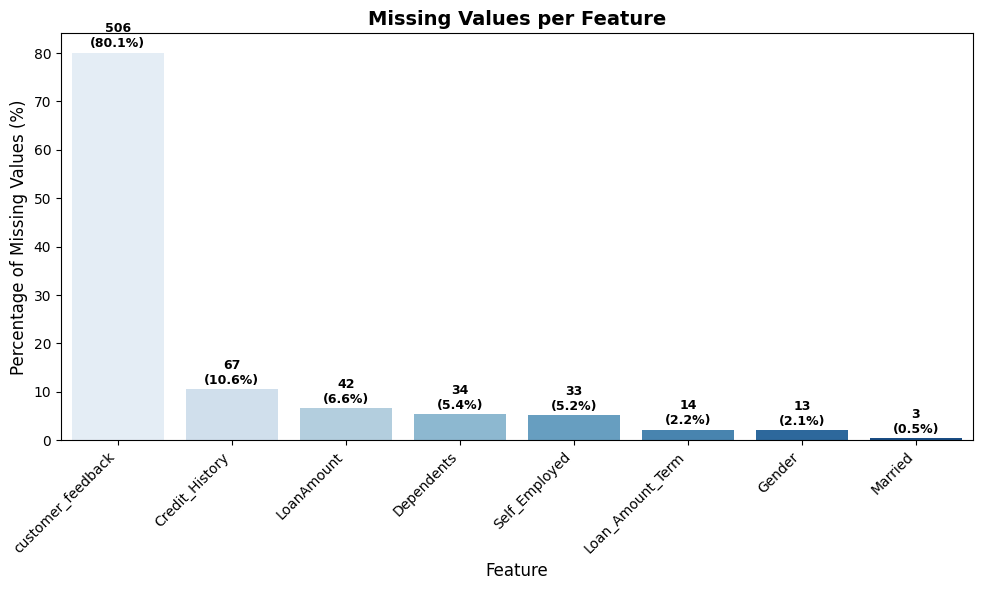

In [260]:
# Calculate missing values
missing_counts = df.isnull().sum()
missing_perc = (missing_counts / len(df)) * 100

# Combine into a single DataFrame for easy plotting
missing_df = pd.DataFrame({
    'Feature': missing_counts.index,
    'Missing Count': missing_counts.values,
    'Missing %': missing_perc.values
})

# Filter only features with missing values
missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values(by='Missing %', ascending=False)
print(missing_df)

# Plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Feature', y='Missing %', data=missing_df, palette='Blues')

# Add annotations (count and %)
for i, row in enumerate(missing_df.itertuples()):
    ax.text(i, row._3 + 0.5, 
            f"{int(row._2)}\n({row._3:.1f}%)", 
            ha='center', va='bottom', fontsize=9, fontweight='bold', color='black')

# Formatting
plt.title("Missing Values per Feature", fontsize=14, fontweight='bold')
plt.ylabel("Percentage of Missing Values (%)", fontsize=12)
plt.xlabel("Feature", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [261]:
#Since out of 632 rows 506 rows of customer_feedback has missing values which is more than 70%
# so it's better to drop this column
df = df.drop('customer_feedback',axis=1)
df.shape

(632, 16)

Now there are 632 columns and 16 rows in the dataset

Separating the categorical and numerical columns from the dataset

In [262]:
#First lets separate the categorical columns first
categorical_cols = df.select_dtypes(include ='object').columns.to_list()
categorical_cols



['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status',
 'service_zone']

Categorical columns include Loan_ID, Gender, Married, Dependents,Education, Self_Employed,
Property_Area, Loan_Status and service_zone


In [263]:
#Now lets separate the numerical columns 

numerical_cols = df.select_dtypes(include=np.number).columns.to_list()
numerical_cols

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Customer_ID',
 'customer_loyalty_score']

The numerical columns include ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_term, Credit_History, Customer_ID and customer_loyalty_score

In [264]:
# Dropping the Loan_ID nad Customer_ID as it has no significant meaning
df = df.drop('Loan_ID', axis=1)
df.shape


(632, 15)

In [265]:
df = df.drop('Customer_ID',axis=1)
df.shape

(632, 14)

In [266]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,customer_loyalty_score,service_zone
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,202,D4
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,535,A1
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,960,A1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,370,A1
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,206,C3


Loan_Status is the target varibale, lets check the unique values it has

In [267]:
df['Loan_Status'].value_counts()

Loan_Status
Y    411
N    193
1     26
0      2
Name: count, dtype: int64

Here we can see there are 4 categories of the target variable, where 1 is reperesenting that the student is eligible to get the loan whereas 0 respresents that the student is not eligible to get the loan


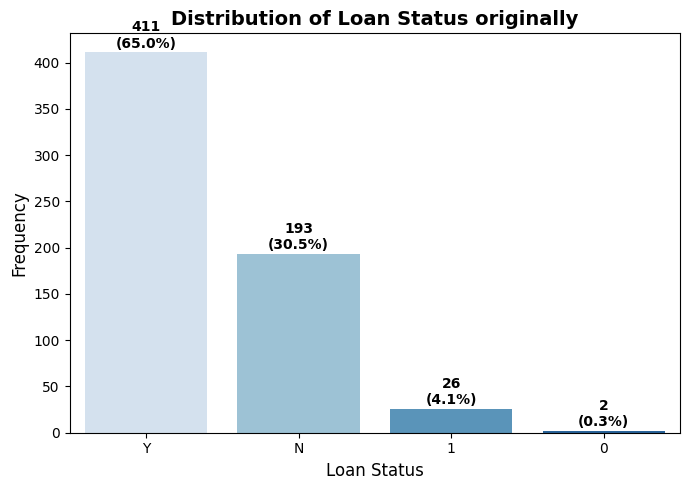

In [268]:
# Calculate value counts and proportions
value_counts = df['Loan_Status'].value_counts()
total = len(df['Loan_Status'])
proportions = (value_counts / total) * 100

# Set plot style
plt.figure(figsize=(7, 5))
ax = sns.countplot(x='Loan_Status', data=df, order=value_counts.index, palette='Blues')

# Add count and proportion annotations on top of bars
for i, category in enumerate(value_counts.index):
    count = value_counts[category]
    prop = proportions[category]
    ax.text(i, count + 2, f"{count}\n({prop:.1f}%)", 
            ha='center', va='bottom', fontsize=10, fontweight='bold', color='black')

# Add labels and title
plt.title("Distribution of Loan Status originally", fontsize=14, fontweight='bold')
plt.xlabel("Loan Status", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.tight_layout()
plt.show()

In [269]:
# Merging 4 classes to two classes
df['Loan_Status'].replace({'1':'Y', '0':'N'}, inplace = True)
df['Loan_Status'].value_counts()

Loan_Status
Y    437
N    195
Name: count, dtype: int64

Now it comes out to be 437 loan requests that were approved and 195 loan requests were rejected, Clearly number of approved requests were more than that of rejected requests.

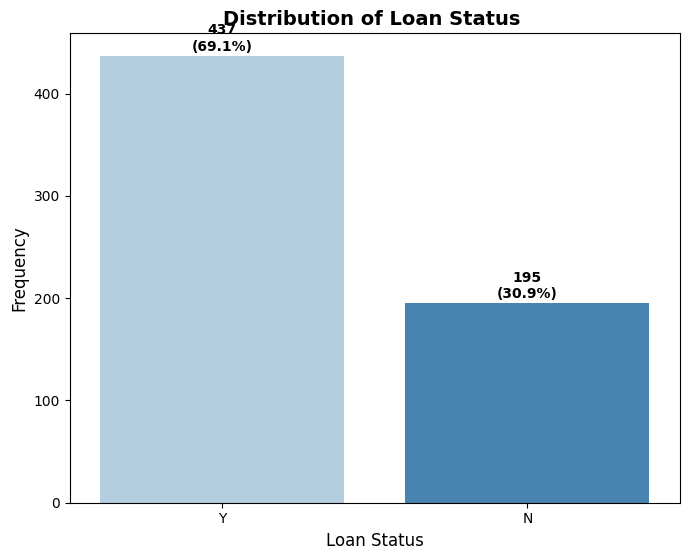

In [321]:
# Calculate value counts and proportions
value_counts = df['Loan_Status'].value_counts()
total = len(df['Loan_Status'])
proportions = (value_counts / total) * 100

# Set plot style
plt.figure(figsize=(7,5.7))
ax = sns.countplot(x='Loan_Status', data=df, order=value_counts.index, palette='Blues')

# Add count and proportion annotations on top of bars
for i, category in enumerate(value_counts.index):
    count = value_counts[category]
    prop = proportions[category]
    ax.text(i, count + 2, f"{count}\n({prop:.1f}%)", 
            ha='center', va='bottom', fontsize=10, fontweight='bold', color='black')

# Add labels and title
plt.title("Distribution of Loan Status ", fontsize=14, fontweight='bold')
plt.xlabel("Loan Status", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.tight_layout()
plt.show()

In [271]:
df['Credit_History'] = df['Credit_History'].astype('object')
df['Credit_History'].dtype

dtype('O')

In [272]:
#Updating the categorical and numerical variables
categorical_cols = df.select_dtypes(include ='object').columns.to_list()
print(categorical_cols)

numerical_cols = df.select_dtypes(include=np.number).columns.to_list()
print(numerical_cols)

['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area', 'Loan_Status', 'service_zone']
['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'customer_loyalty_score']


Visualizing the dataset


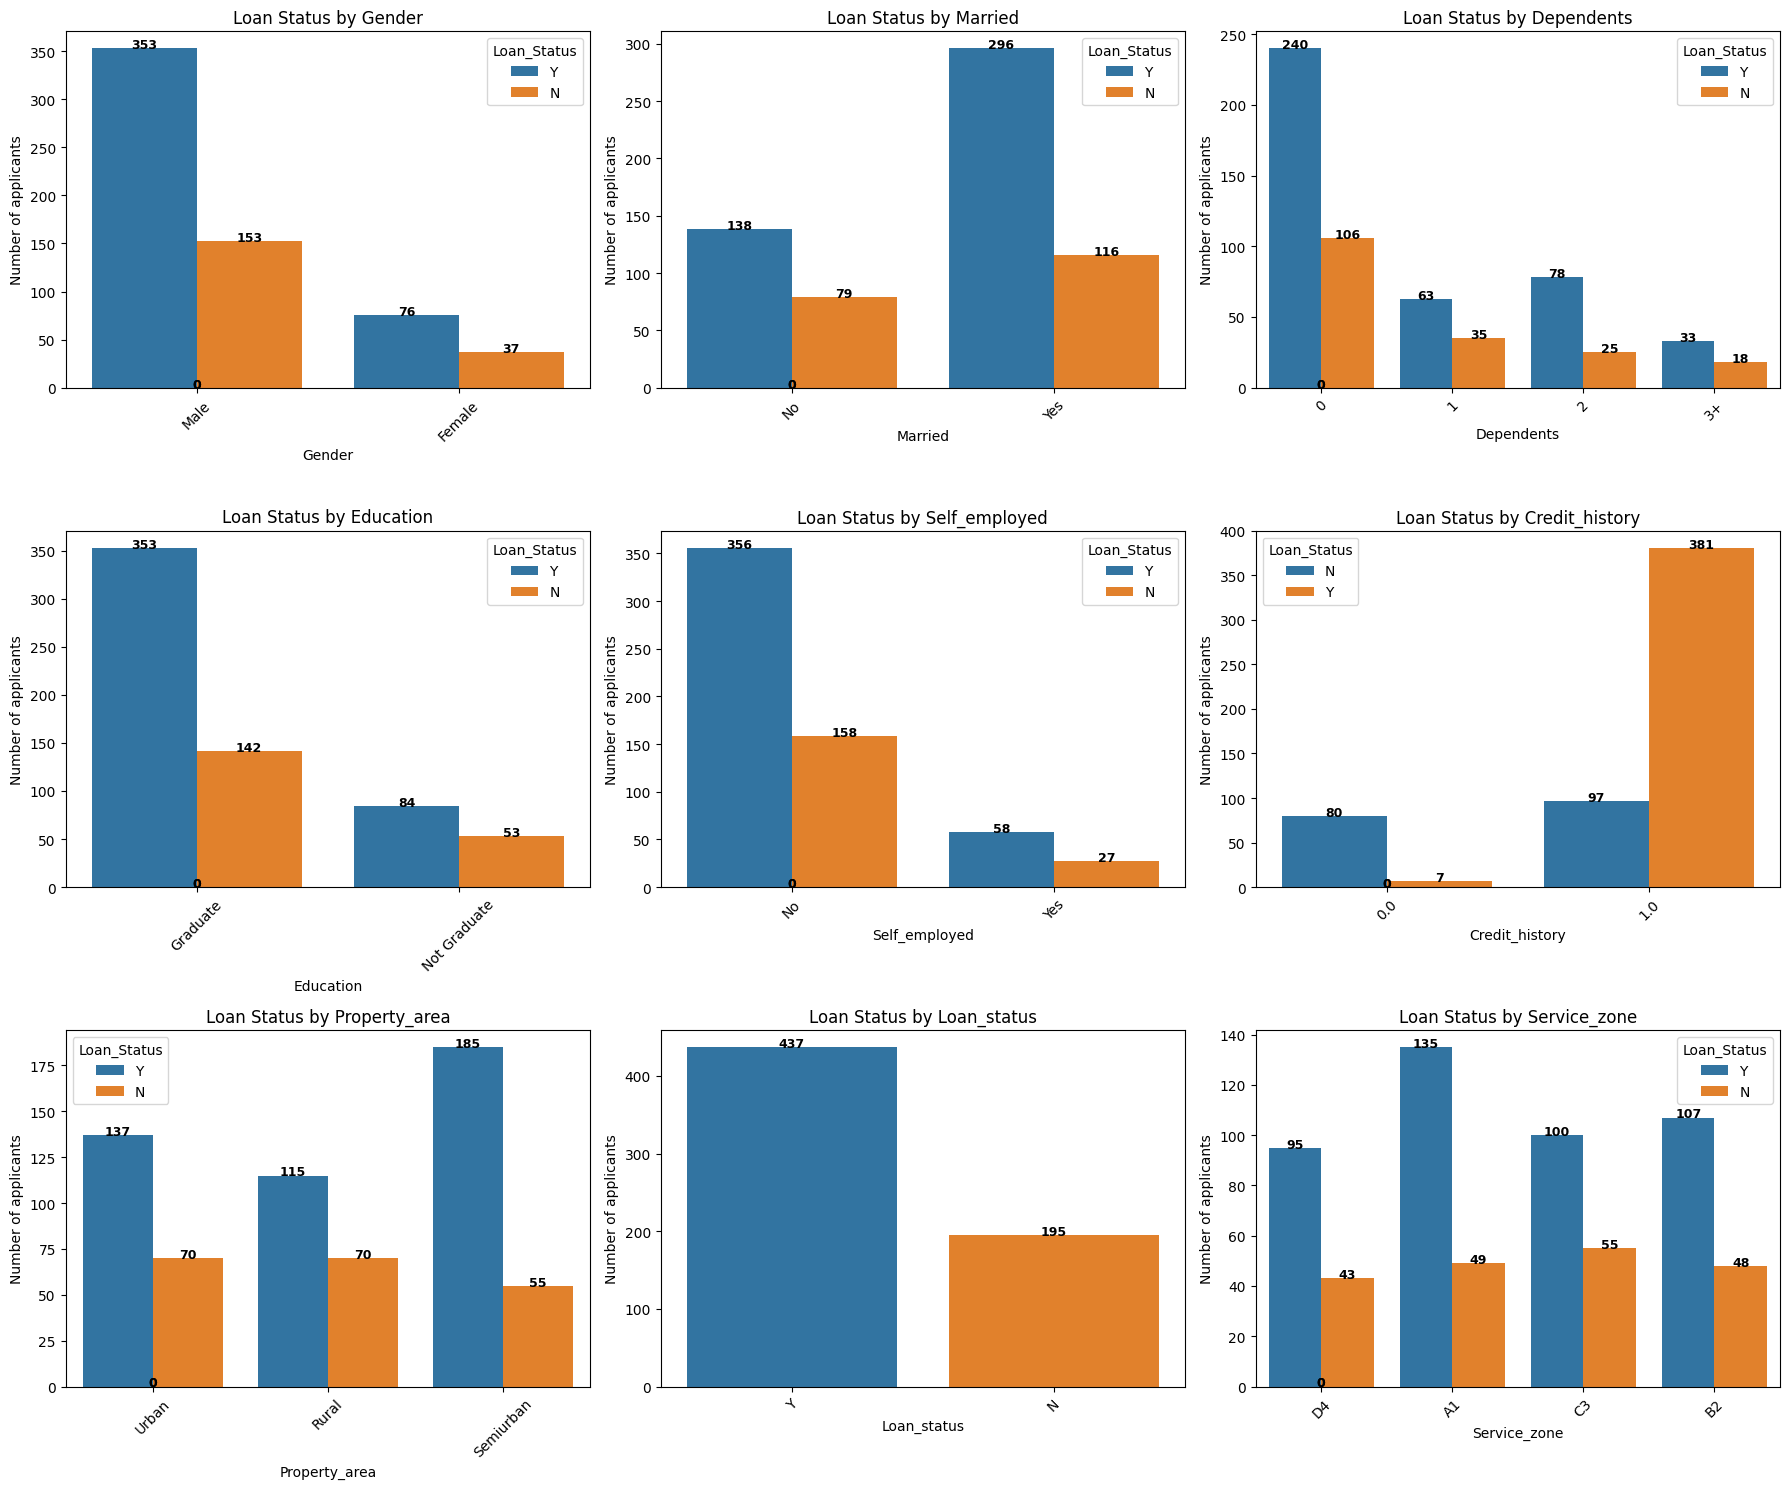

In [273]:
# for col in categorical_cols:
#     plt.figure
#     sns.countplot(x=col, data=df, hue='Loan_Status')
#     plt.xlabel(col.capitalize())
#     plt.ylabel('Loan Status')
#     plt.show()
n_cols = 3  # Number of plots per row (adjust as needed)
n_rows = math.ceil(len(categorical_cols) / n_cols)

plt.figure(figsize=(n_cols * 6, n_rows * 5))  # Adjust size as needed

for idx, col in enumerate(categorical_cols, 1):
    plt.subplot(n_rows, n_cols, idx)
    ax=sns.countplot(x=col, data=df, hue='Loan_Status')
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width()/2., height + 0.05,  # position
                int(height), ha="center", fontsize=9, fontweight="bold")

    plt.title(f'Loan Status by {col.capitalize()}')
    plt.xlabel(col.capitalize())
    plt.ylabel('Number of applicants')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


Visualizing the numerical variables with the Loan_status of the students


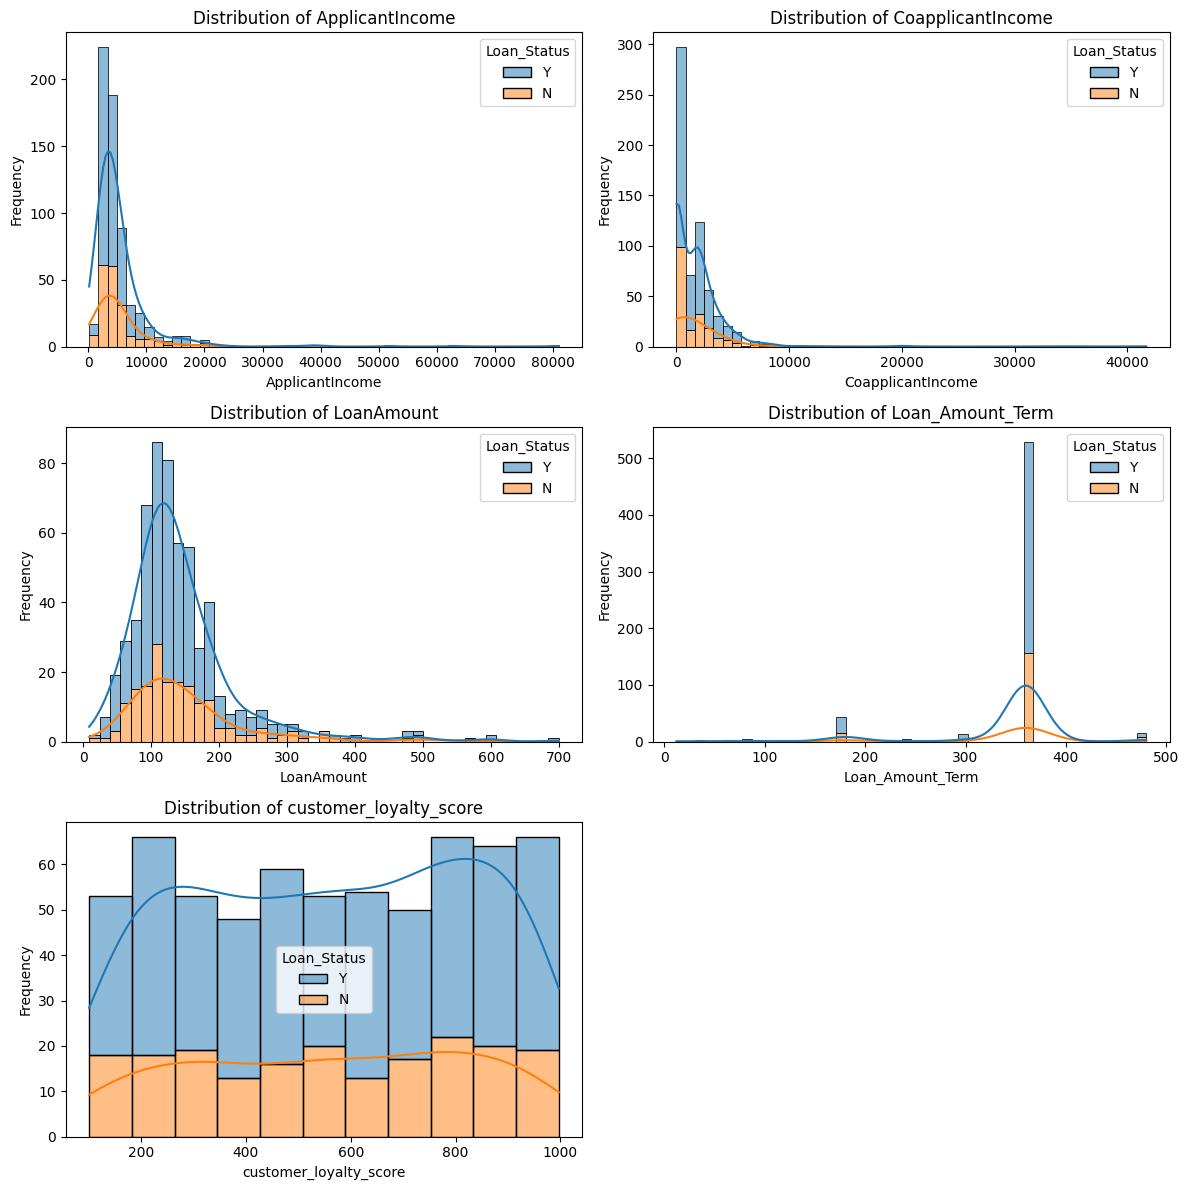

In [274]:
#Histogram for the visualization of the numerical variables
n_cols = 2  # Number of plots per row (adjust as needed)
n_rows = math.ceil(len(numerical_cols) / n_cols)

plt.figure(figsize=(n_cols * 6, n_rows * 4))  # Increase size for clarity

for idx, col in enumerate(numerical_cols, 1):
    plt.subplot(n_rows, n_cols, idx)
    sns.histplot(data=df, x=col, hue='Loan_Status', kde=True, multiple='stack')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


Here loan amount, applicant income and coapplicant income are positively skewed. 

Boxplot of the numerical variable with the target 

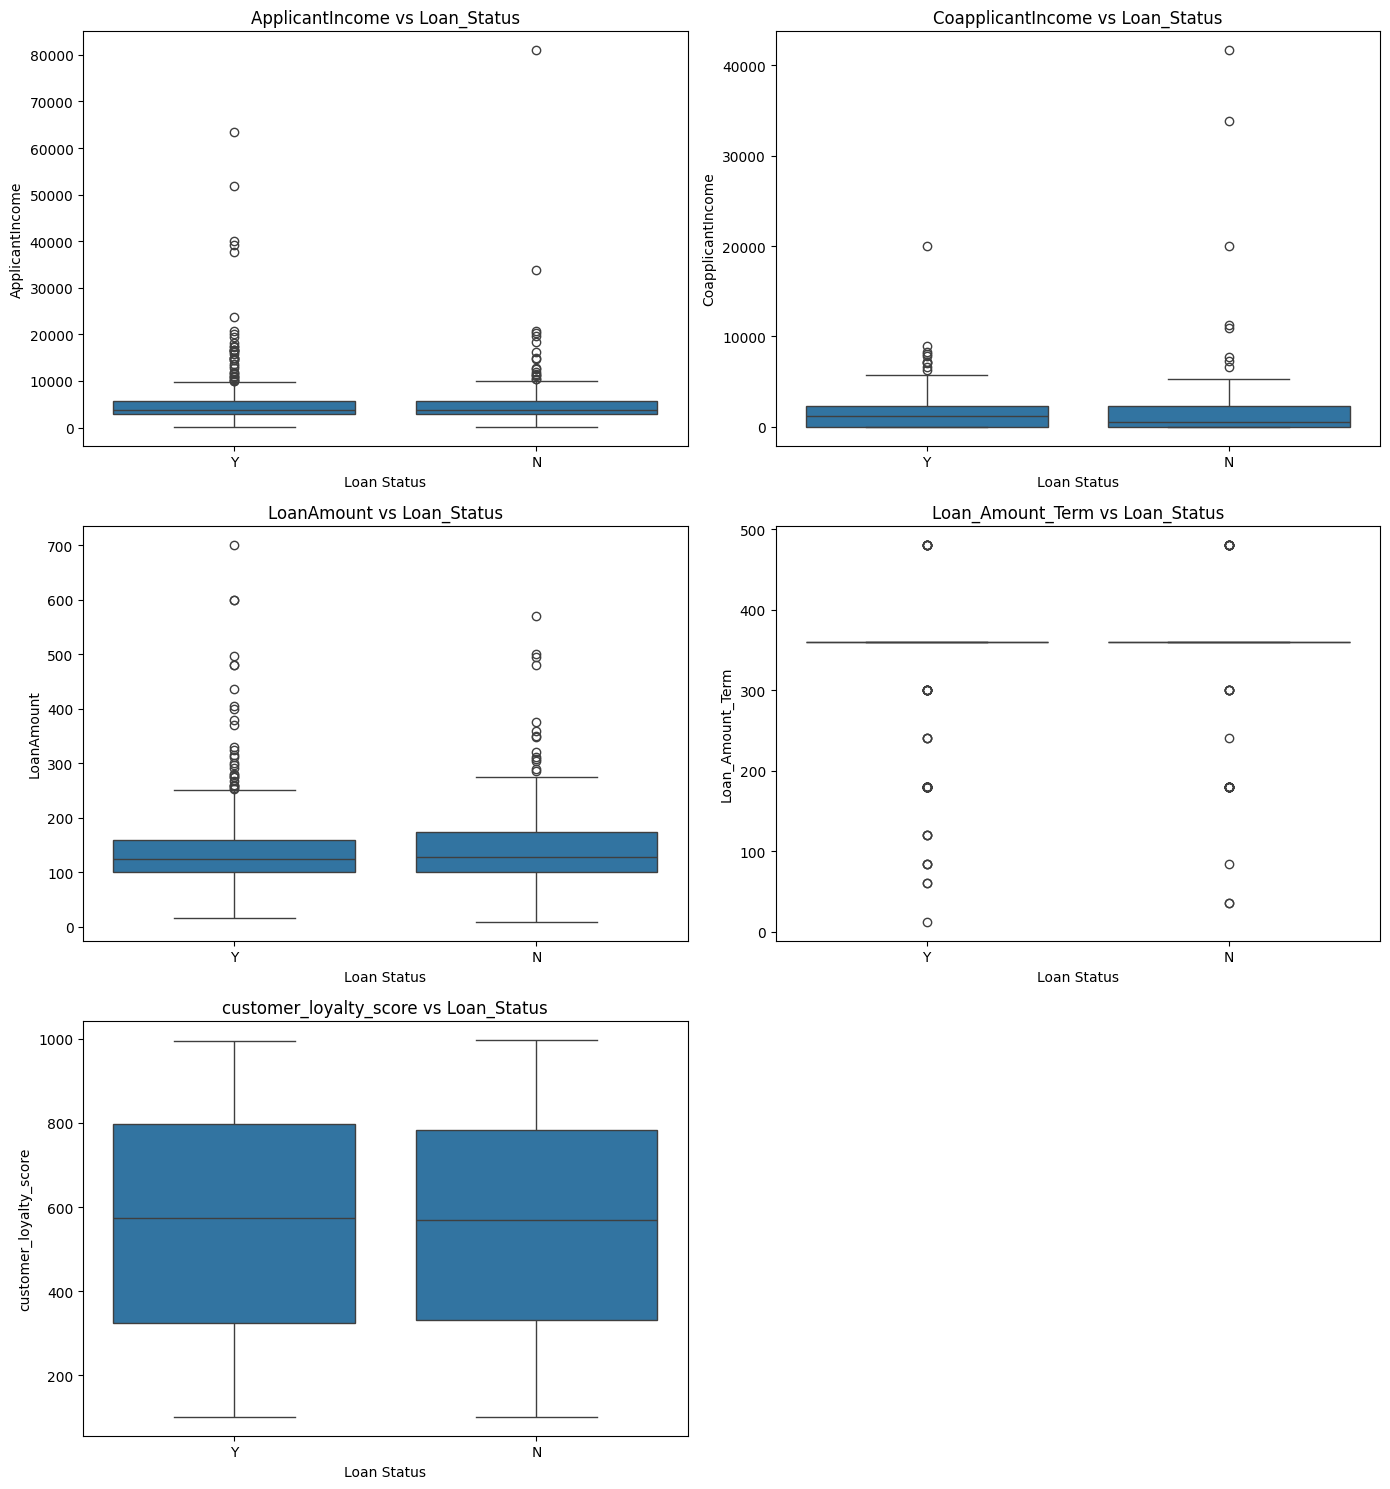

In [275]:
plt.figure(figsize=(n_cols * 7, n_rows * 5))

for idx, col in enumerate(numerical_cols, 1):
    plt.subplot(n_rows, n_cols, idx)
    sns.boxplot(x='Loan_Status', y=col, data=df)
    plt.title(f'{col} vs Loan_Status')
    plt.xlabel('Loan Status')
    plt.ylabel(col)

plt.tight_layout()
plt.show()


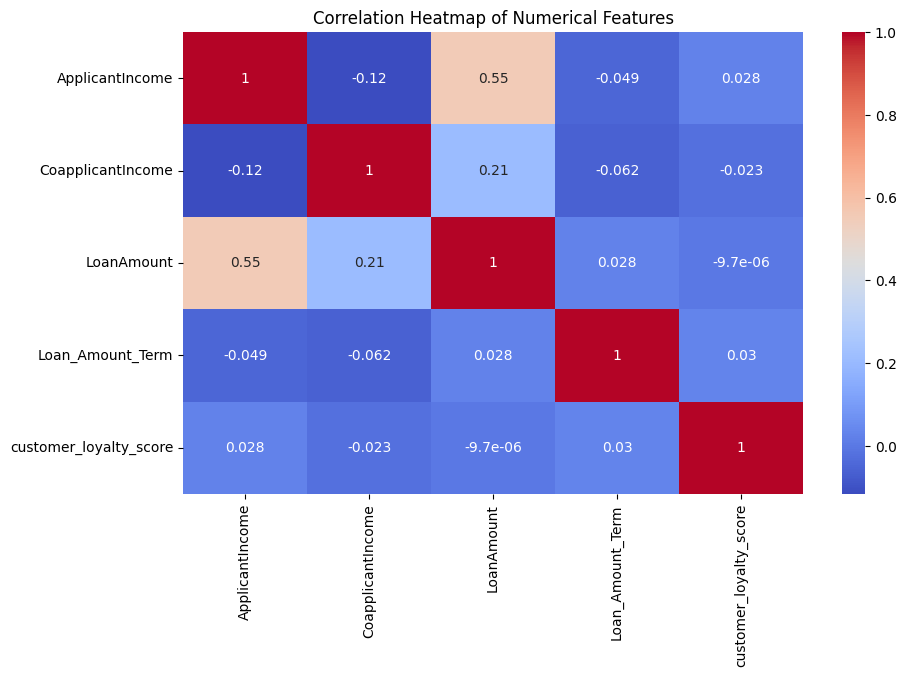

In [276]:
plt.figure(figsize=(10,6))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


Handling missing values for the columns of the dataset


In [277]:
df.isnull().sum()

Gender                    13
Married                    3
Dependents                34
Education                  0
Self_Employed             33
ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                42
Loan_Amount_Term          14
Credit_History            67
Property_Area              0
Loan_Status                0
customer_loyalty_score     0
service_zone               0
dtype: int64

In [278]:
print(df['Gender'].value_counts())
print(df['Married'].value_counts())
print(df['Dependents'].value_counts())
print(df['Self_Employed'].value_counts())
print(df['Credit_History'].value_counts())

Gender
Male      506
Female    113
Name: count, dtype: int64
Married
Yes    412
No     217
Name: count, dtype: int64
Dependents
0     346
2     103
1      98
3+     51
Name: count, dtype: int64
Self_Employed
No     514
Yes     85
Name: count, dtype: int64
Credit_History
1.0    478
0.0     87
Name: count, dtype: int64


In [279]:
categorical_cols = df.select_dtypes(include='object').columns.to_list()
categorical_cols.remove('Loan_Status')
categorical_cols

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Credit_History',
 'Property_Area',
 'service_zone']

In [280]:


# Impute missing values with mode
for col in categorical_cols:
    mode_value = df[col].mode()[0]   # most frequent value
    df[col].fillna(mode_value, inplace=True)

# Verify no missing values remain
print(df[categorical_cols].isnull().sum())


Gender            0
Married           0
Dependents        0
Education         0
Self_Employed     0
Credit_History    0
Property_Area     0
service_zone      0
dtype: int64


In [281]:
numerical_cols

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'customer_loyalty_score']

In [282]:
for col in numerical_cols:
    df[col].fillna(df[col].median(), inplace=True)

# Verify that missing values are handled
print(df[numerical_cols].isnull().sum())

ApplicantIncome           0
CoapplicantIncome         0
LoanAmount                0
Loan_Amount_Term          0
customer_loyalty_score    0
dtype: int64


In [283]:
df.isnull().sum()

Gender                    0
Married                   0
Dependents                0
Education                 0
Self_Employed             0
ApplicantIncome           0
CoapplicantIncome         0
LoanAmount                0
Loan_Amount_Term          0
Credit_History            0
Property_Area             0
Loan_Status               0
customer_loyalty_score    0
service_zone              0
dtype: int64

Now the null values are handled


Now lets treat the skewness in the numerical features

In [284]:
skewness = df[numerical_cols].skew()
skewness

ApplicantIncome           6.609565
CoapplicantIncome         7.534402
LoanAmount                2.752330
Loan_Amount_Term         -2.412888
customer_loyalty_score   -0.068739
dtype: float64

Treating the skewed columns of the dataset

In [285]:
skewed_cols = skewness[skewness > 0.5].index  # you can adjust 0.5 if needed

# Apply log1p transformation
for col in skewed_cols:
    df[col] = np.log1p(df[col])

# Check new skewness
new_skewness = df[numerical_cols].skew()
print("Skewness after transformation:\n", new_skewness)

Skewness after transformation:
 ApplicantIncome           0.489358
CoapplicantIncome        -0.173752
LoanAmount               -0.197300
Loan_Amount_Term         -2.412888
customer_loyalty_score   -0.068739
dtype: float64


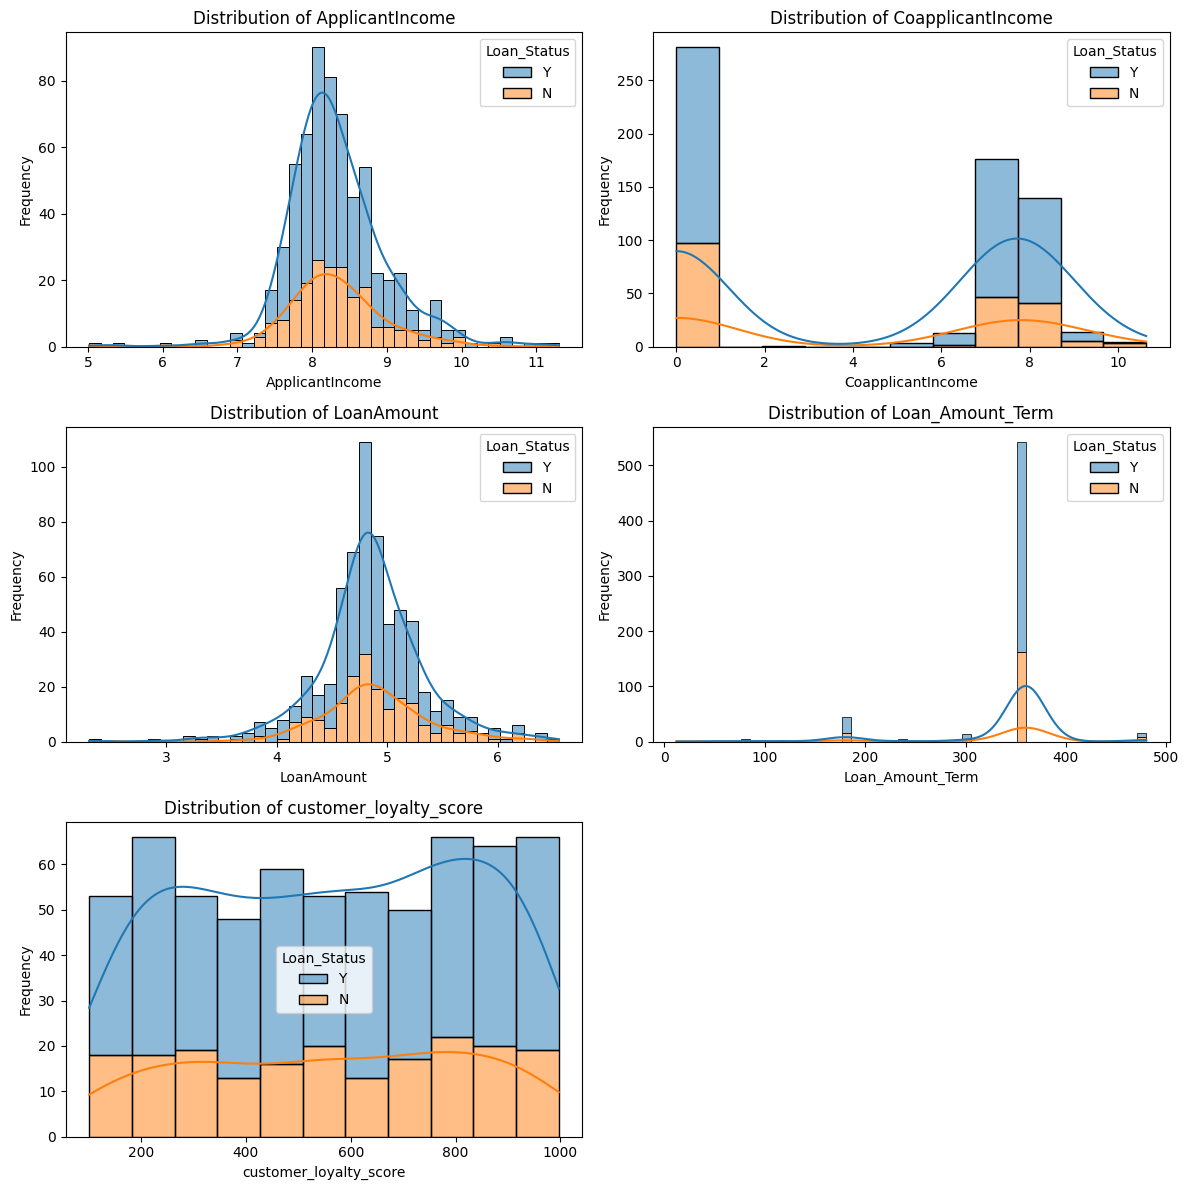

In [286]:
#Histogram for the visualization of the numerical variables
n_cols = 2  # Number of plots per row (adjust as needed)
n_rows = math.ceil(len(numerical_cols) / n_cols)

plt.figure(figsize=(n_cols * 6, n_rows * 4))  # Increase size for clarity

for idx, col in enumerate(numerical_cols, 1):
    plt.subplot(n_rows, n_cols, idx)
    sns.histplot(data=df, x=col, hue='Loan_Status', kde=True, multiple='stack')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Plotting the boxplot again to detect the outliers

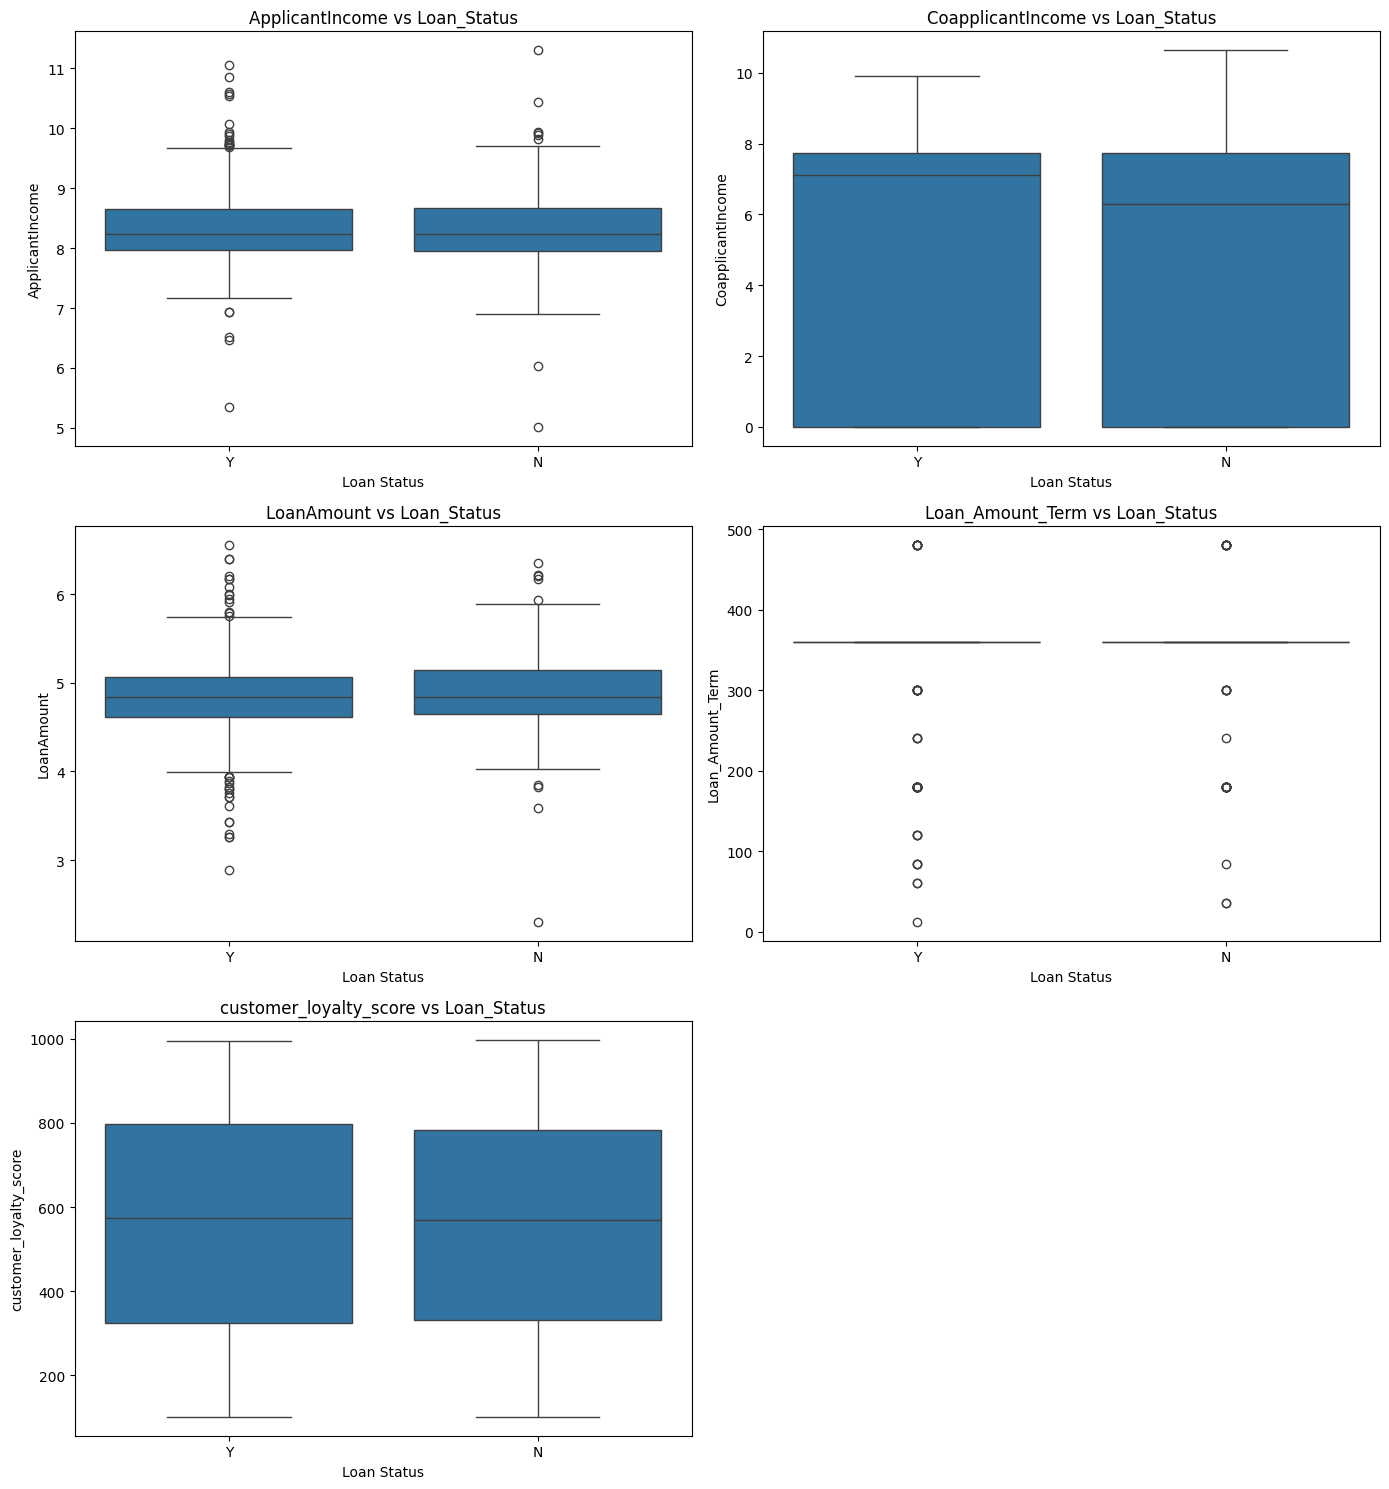

In [287]:
plt.figure(figsize=(n_cols * 7, n_rows * 5))

for idx, col in enumerate(numerical_cols, 1):
    plt.subplot(n_rows, n_cols, idx)
    sns.boxplot(x='Loan_Status', y=col, data=df)
    plt.title(f'{col} vs Loan_Status')
    plt.xlabel('Loan Status')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

Performing Train Test split 


In [288]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop('Loan_Status', axis=1)
print(X.shape)
y = df['Loan_Status']
print(y.shape)


(632, 13)
(632,)


In [289]:
#Split the dataset into train-test split first

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)



In [290]:
# Fit scaler on training numerical data
scaler = StandardScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])

# Transform test numerical data using the same scaler
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])


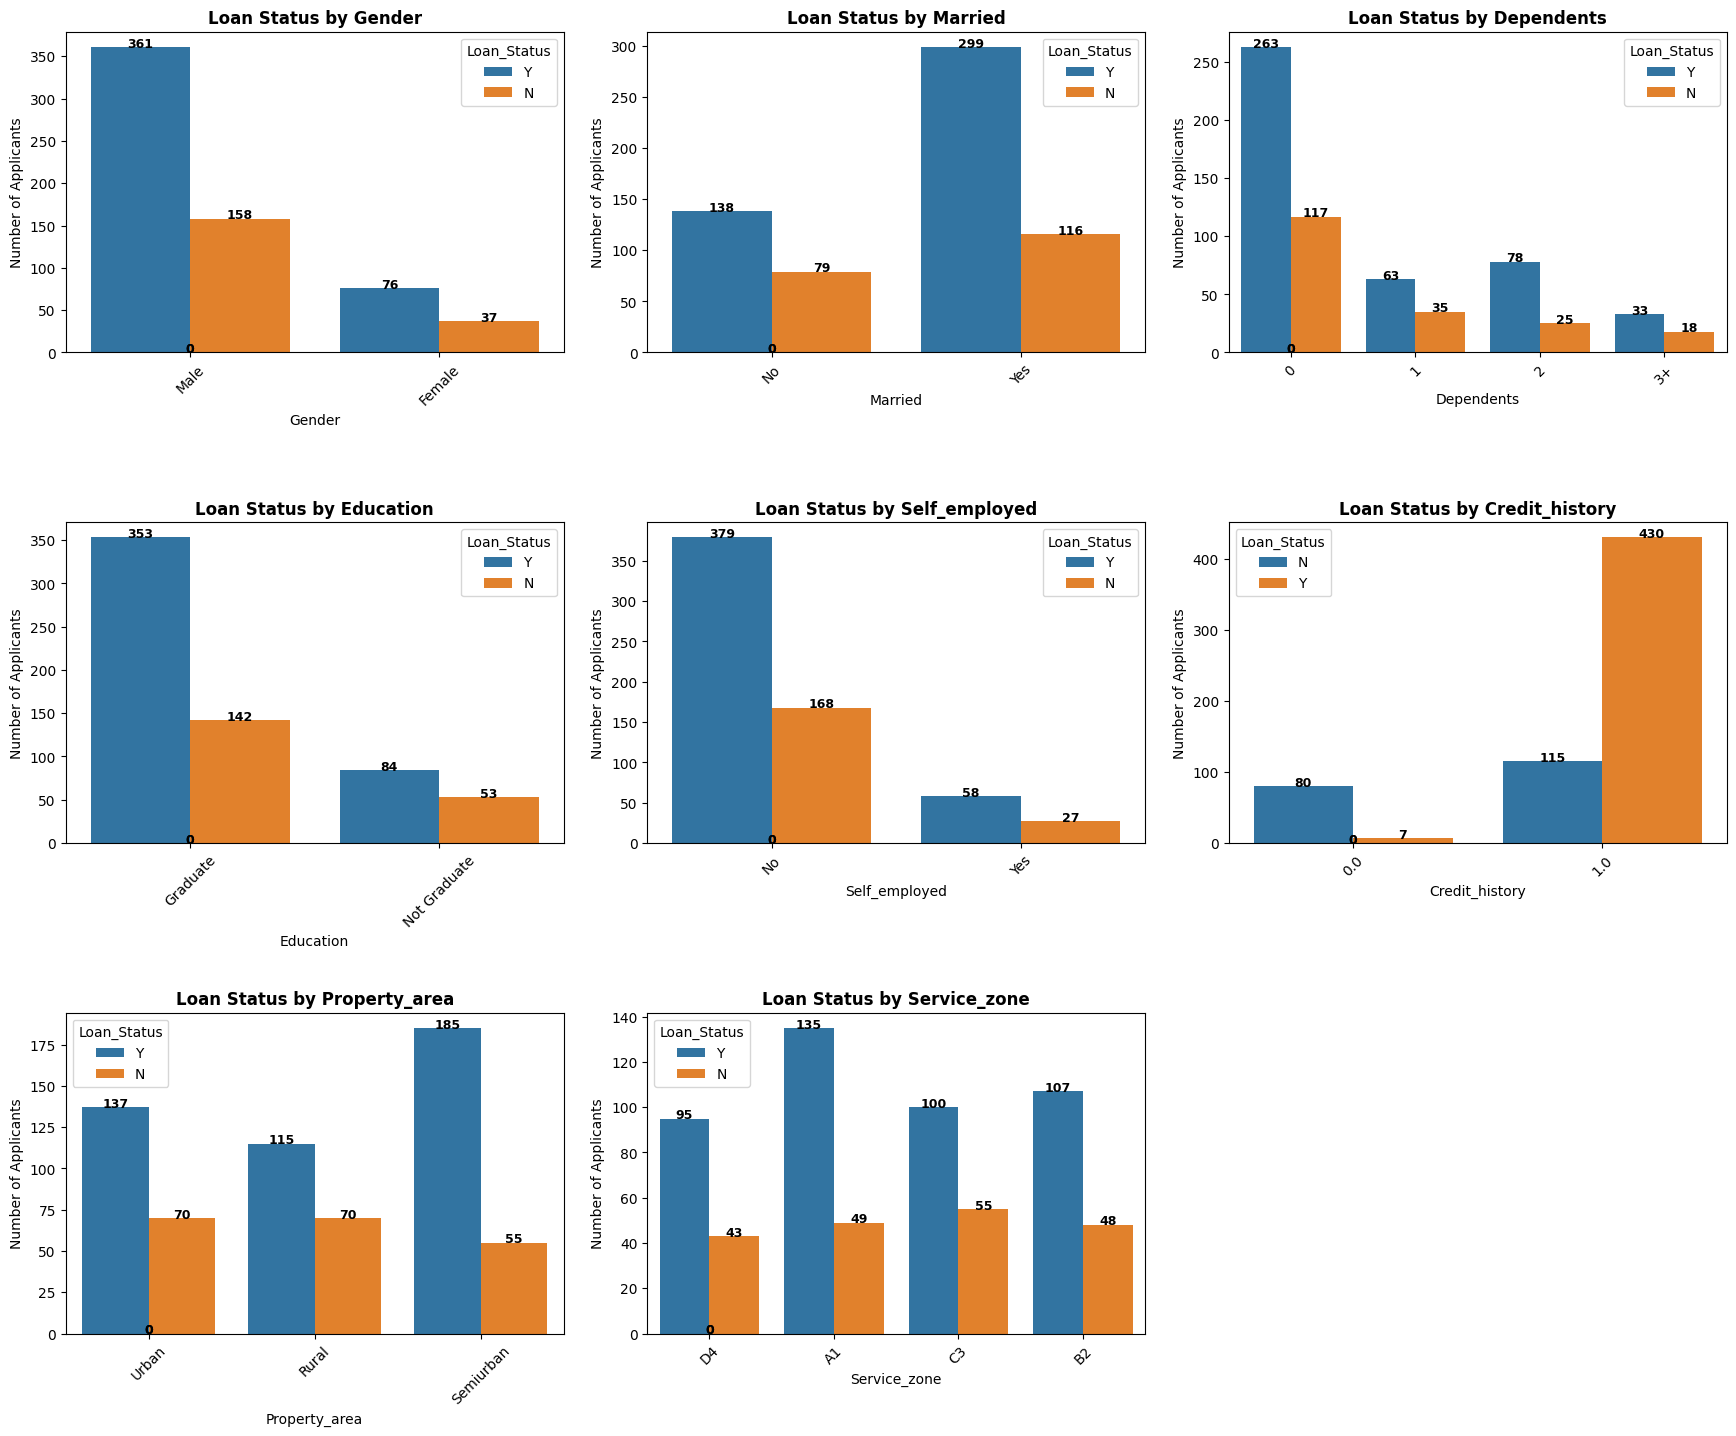

In [296]:
n_cols = 3  # Number of plots per row
n_rows = math.ceil(len(categorical_cols) / n_cols)

# Increase figure size proportionally to the number of rows & columns
plt.figure(figsize=(n_cols * 6, n_rows * 5))  # Increase size for better spacing

for idx, col in enumerate(categorical_cols, 1):
    plt.subplot(n_rows, n_cols, idx)
    ax = sns.countplot(x=col, data=df, hue='Loan_Status')
    
    # Add count labels on top of bars
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width()/2., height + 0.05,
                int(height), ha="center", fontsize=9, fontweight="bold")

    plt.title(f'Loan Status by {col.capitalize()}', fontsize=12, fontweight='bold')
    plt.xlabel(col.capitalize())
    plt.ylabel('Number of Applicants')
    plt.xticks(rotation=45)

plt.tight_layout(pad=3.0, w_pad=2.0, h_pad=3.0)

# Display the full figure without cropping
plt.show()



In [109]:
categorical_cols

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Credit_History',
 'Property_Area',
 'service_zone']

Performing Label encoding for the categorical varaibales


In [298]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Binary columns – Label Encoding
binary_cols = ['Gender', 'Married', 'Self_Employed', 'Credit_History','Education']
le = LabelEncoder()

for col in binary_cols:
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])

# Multi-class Nominal – One Hot Encoding
multi_class_cols = ['Dependents', 'Property_Area', 'service_zone']

X_train = pd.get_dummies(X_train, columns=multi_class_cols, drop_first=True,dtype=int)
X_test = pd.get_dummies(X_test, columns=multi_class_cols, drop_first=True, dtype=int)

# Ensure both train & test have same columns after encoding
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)



In [111]:
X_test.shape


(127, 18)

In [299]:
X_train.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,customer_loyalty_score,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Semiurban,Property_Area_Urban,service_zone_B2,service_zone_C3,service_zone_D4
61,1,1,0,0,-0.528320,-1.089140,-0.521741,0.288063,1,-0.279281,0,0,1,0,1,0,0,1
126,1,1,0,0,2.758295,-1.089140,2.249325,0.288063,1,-0.447913,0,0,1,0,0,0,1,0
453,1,1,0,0,-0.845125,0.922649,-0.721081,-2.439530,0,0.402909,0,0,0,0,0,0,1,0
127,1,0,0,0,-0.139821,0.817640,-0.016542,0.288063,1,-1.271907,0,0,0,0,0,1,0,0
397,1,1,0,0,-0.526217,0.787539,-0.608025,0.288063,1,1.108095,0,0,0,0,1,1,0,0


In [113]:
X_test.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,customer_loyalty_score,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Semiurban,Property_Area_Urban,service_zone_B2,service_zone_C3,service_zone_D4
184,0,1,0,0,-0.242010,-1.089140,-0.339591,0.288063,1,0.395244,0,0,0,1,0,1,0,0
224,1,1,0,0,0.626343,-1.089140,0.016484,0.288063,1,0.659689,0,0,0,1,0,0,0,0
561,0,1,0,1,2.439073,-1.089140,3.268935,0.288063,1,1.307386,1,0,0,1,0,0,0,0
385,1,0,0,0,-0.223648,-1.089140,-0.244793,-2.439530,1,-0.263951,1,0,0,0,1,1,0,0
558,1,1,0,0,-0.130774,0.943016,0.510947,0.288063,1,0.663521,0,0,0,1,0,1,0,0


In [114]:
y_train 

61     Y
126    Y
453    Y
127    Y
397    Y
      ..
213    Y
119    Y
187    Y
612    Y
198    Y
Name: Loan_Status, Length: 505, dtype: object

In [306]:
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [307]:
y_train

array([1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,

In [117]:
y_test

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1])

Now lets train our model

The accuracy Score is: 
0.8346456692913385


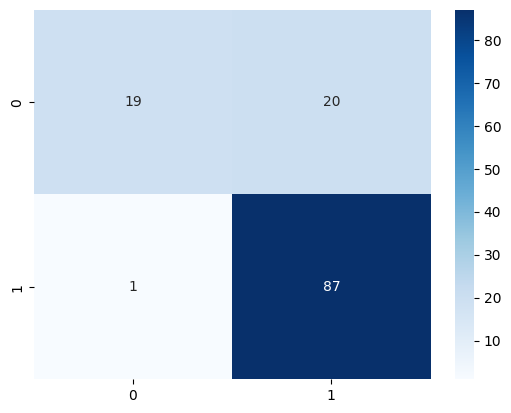

              precision    recall  f1-score   support

           0       0.95      0.49      0.64        39
           1       0.81      0.99      0.89        88

    accuracy                           0.83       127
   macro avg       0.88      0.74      0.77       127
weighted avg       0.86      0.83      0.82       127



In [118]:
# lets start with Logistic Regression as our base model 
lr = LogisticRegression()
lr.fit(X_train,y_train)

y_pred = lr.predict(X_test)

print("The accuracy Score is: ")
print(accuracy_score(y_test,y_pred))

cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True, fmt='d',cmap='Blues')
plt.show()

print(classification_report(y_test, y_pred))

The accuracy Score is: 
0.7716535433070866


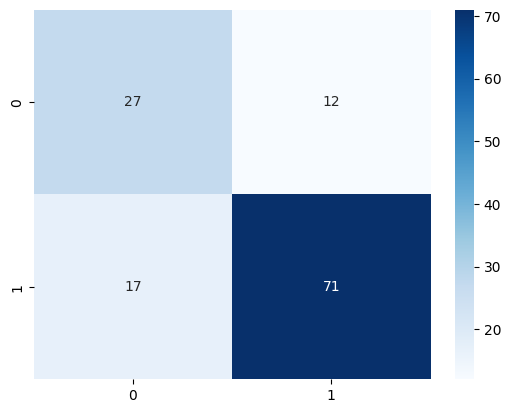

              precision    recall  f1-score   support

           0       0.61      0.69      0.65        39
           1       0.86      0.81      0.83        88

    accuracy                           0.77       127
   macro avg       0.73      0.75      0.74       127
weighted avg       0.78      0.77      0.78       127



In [119]:
# Now we are handling the class imbalance

lr = LogisticRegression(class_weight='balanced',random_state=42)
lr.fit(X_train,y_train)

y_pred = lr.predict(X_test)

print("The accuracy Score is: ")
print(accuracy_score(y_test,y_pred))

cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True, fmt='d',cmap='Blues')
plt.show()

print(classification_report(y_test, y_pred))

Here we can see that after handling the class imbalance the the recall for the rejected loan status has increased

The accuracy Score is: 
0.7480314960629921


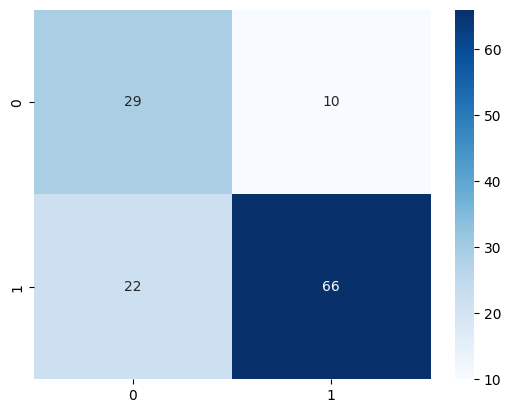

              precision    recall  f1-score   support

           0       0.57      0.74      0.64        39
           1       0.87      0.75      0.80        88

    accuracy                           0.75       127
   macro avg       0.72      0.75      0.72       127
weighted avg       0.78      0.75      0.76       127



In [136]:
#Using SMOTE to handle imabalance in the dataset
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)
lr.fit(X_train_res, y_train_res)

y_pred =lr.predict(X_test)

print("The accuracy Score is: ")
print(accuracy_score(y_test,y_pred))

cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True, fmt='d',cmap='Blues')
plt.show()

print(classification_report(y_test, y_pred))

Using Decision Tree

The accuracy Score is: 
0.7086614173228346


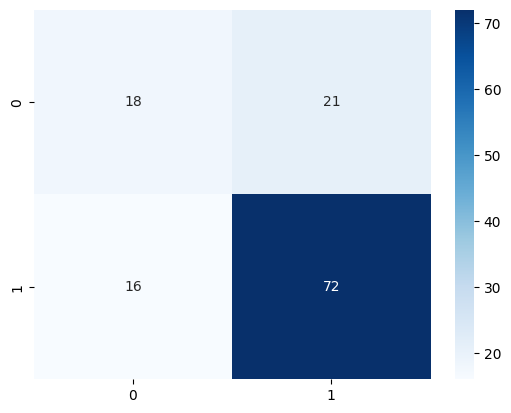

              precision    recall  f1-score   support

           0       0.53      0.46      0.49        39
           1       0.77      0.82      0.80        88

    accuracy                           0.71       127
   macro avg       0.65      0.64      0.64       127
weighted avg       0.70      0.71      0.70       127



In [120]:
# using decision trees
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

dt_y_pred = dt.predict(X_test)

print("The accuracy Score is: ")
print(accuracy_score(y_test,dt_y_pred))

cm = confusion_matrix(y_test,dt_y_pred)
sns.heatmap(cm,annot=True, fmt='d',cmap='Blues')
plt.show()

print(classification_report(y_test, dt_y_pred))

The accuracy Score is: 
0.7165354330708661


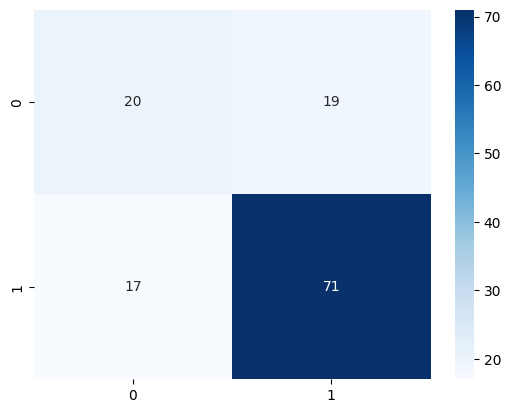

              precision    recall  f1-score   support

           0       0.54      0.51      0.53        39
           1       0.79      0.81      0.80        88

    accuracy                           0.72       127
   macro avg       0.66      0.66      0.66       127
weighted avg       0.71      0.72      0.71       127



In [121]:
#After handling the class imabalance
dt = DecisionTreeClassifier(class_weight='balanced',random_state=42)
dt.fit(X_train,y_train)

dt_y_pred = dt.predict(X_test)

print("The accuracy Score is: ")
print(accuracy_score(y_test,dt_y_pred))

cm = confusion_matrix(y_test,dt_y_pred)
sns.heatmap(cm,annot=True, fmt='d',cmap='Blues')
plt.show()

print(classification_report(y_test, dt_y_pred))

The accuracy Score is: 
0.7559055118110236


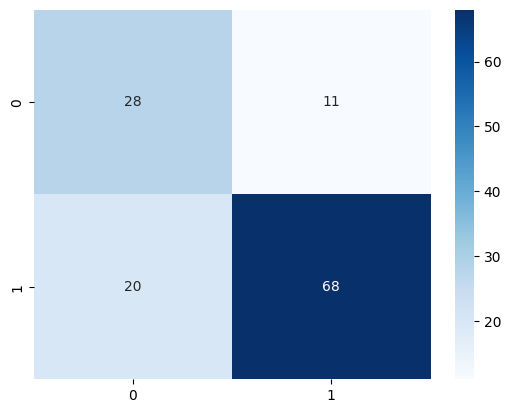

              precision    recall  f1-score   support

           0       0.58      0.72      0.64        39
           1       0.86      0.77      0.81        88

    accuracy                           0.76       127
   macro avg       0.72      0.75      0.73       127
weighted avg       0.78      0.76      0.76       127



In [137]:
#Using SMOTE to handle imabalance in the dataset
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)
dt.fit(X_train_res, y_train_res)

dt_y_pred =dt.predict(X_test)

print("The accuracy Score is: ")
print(accuracy_score(y_test,dt_y_pred))

cm = confusion_matrix(y_test,dt_y_pred)
sns.heatmap(cm,annot=True, fmt='d',cmap='Blues')
plt.show()

print(classification_report(y_test, dt_y_pred))

Fitting 5 folds for each of 270 candidates, totalling 1350 fits
Best parameters: {'criterion': 'gini', 'max_depth': 3, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 10}
Best F1 Score: 0.8687837322800259
The Accuracy Score is: 0.8188976377952756


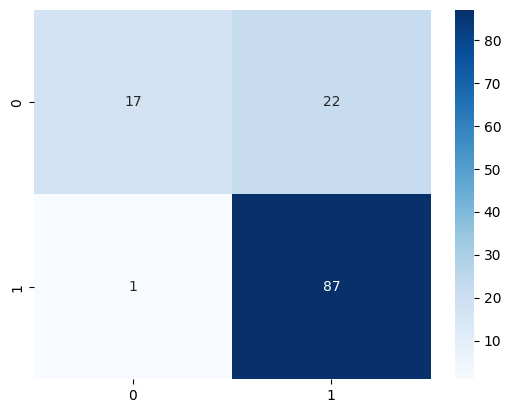

              precision    recall  f1-score   support

           0       0.94      0.44      0.60        39
           1       0.80      0.99      0.88        88

    accuracy                           0.82       127
   macro avg       0.87      0.71      0.74       127
weighted avg       0.84      0.82      0.80       127



In [160]:
# Common hyperparameters for tuning
param_grid = {
    'criterion': ['gini', 'entropy'],         # Function to measure quality of split
    'max_depth': [None, 3, 5, 7, 10],        # Maximum depth of tree
    'min_samples_split': [2, 5, 10],         # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4],           # Minimum samples required at a leaf node
    'max_features': [None, 'sqrt', 'log2']   # Number of features to consider at each split
}
dt = DecisionTreeClassifier(random_state=42)

# Using multiple scoring metrics (precision, recall, f1)
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1'
}

grid_search = GridSearchCV(
    estimator=dt,
    param_grid=param_grid,
    scoring=scoring,
    refit='f1',   # Optimize for F1 score
    cv=5,
    n_jobs=1,
    verbose=1
)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best F1 Score:", grid_search.best_score_)
best_dt = grid_search.best_estimator_
dt_y_pred = best_dt.predict(X_test)

# Accuracy
print("The Accuracy Score is:", accuracy_score(y_test, dt_y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, dt_y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.show()

# Classification Report
print(classification_report(y_test, dt_y_pred))


Rnadom Forest

The accuracy Score is: 
0.8188976377952756


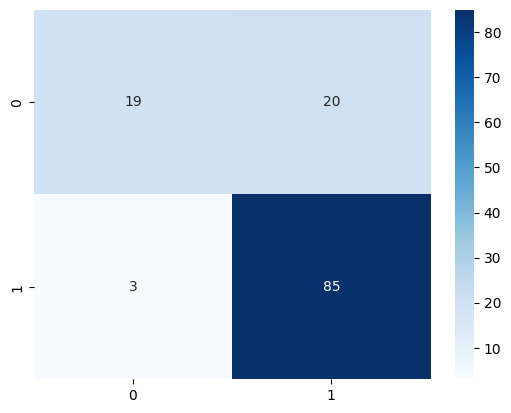

              precision    recall  f1-score   support

           0       0.86      0.49      0.62        39
           1       0.81      0.97      0.88        88

    accuracy                           0.82       127
   macro avg       0.84      0.73      0.75       127
weighted avg       0.83      0.82      0.80       127



In [122]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

rf_y_pred =rf.predict(X_test)

print("The accuracy Score is: ")
print(accuracy_score(y_test,rf_y_pred))

cm = confusion_matrix(y_test,rf_y_pred)
sns.heatmap(cm,annot=True, fmt='d',cmap='Blues')
plt.show()

print(classification_report(y_test, rf_y_pred))

The accuracy Score is: 
0.8267716535433071


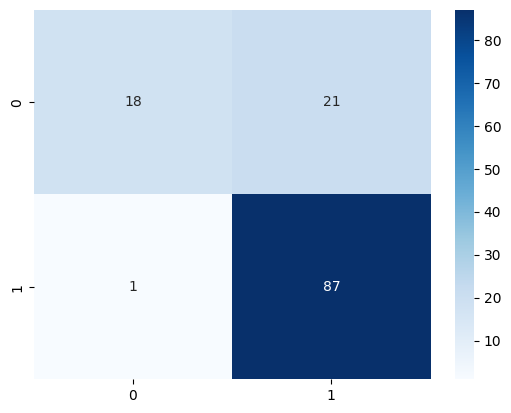

              precision    recall  f1-score   support

           0       0.95      0.46      0.62        39
           1       0.81      0.99      0.89        88

    accuracy                           0.83       127
   macro avg       0.88      0.73      0.75       127
weighted avg       0.85      0.83      0.81       127



In [123]:
#After balancing the class imbalance
rf = RandomForestClassifier(class_weight='balanced',random_state=42)
rf.fit(X_train,y_train)

rf_y_pred =rf.predict(X_test)

print("The accuracy Score is: ")
print(accuracy_score(y_test,rf_y_pred))

cm = confusion_matrix(y_test,rf_y_pred)
sns.heatmap(cm,annot=True, fmt='d',cmap='Blues')
plt.show()

print(classification_report(y_test, rf_y_pred))

The accuracy Score is: 
0.7874015748031497


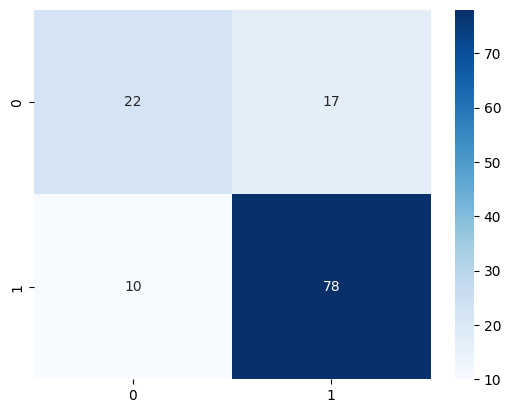

              precision    recall  f1-score   support

           0       0.69      0.56      0.62        39
           1       0.82      0.89      0.85        88

    accuracy                           0.79       127
   macro avg       0.75      0.73      0.74       127
weighted avg       0.78      0.79      0.78       127



In [138]:
#Using SMOTE to handle imabalance in the dataset
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)
rf.fit(X_train_res, y_train_res)

rf_y_pred =rf.predict(X_test)

print("The accuracy Score is: ")
print(accuracy_score(y_test,rf_y_pred))

cm = confusion_matrix(y_test,rf_y_pred)
sns.heatmap(cm,annot=True, fmt='d',cmap='Blues')
plt.show()

print(classification_report(y_test, rf_y_pred))

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Parameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': None, 'bootstrap': True}
Best F1 Score (CV): 0.8759867286514424

Test Accuracy: 0.8031496062992126

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.46      0.59        39
           1       0.80      0.95      0.87        88

    accuracy                           0.80       127
   macro avg       0.81      0.71      0.73       127
weighted avg       0.81      0.80      0.78       127



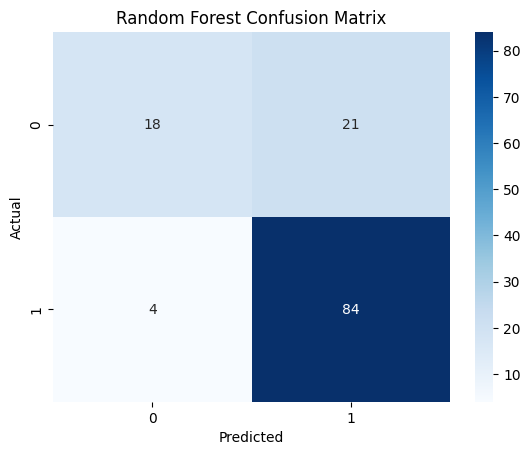


Top 10 Important Features:
Credit_History: 0.3126
ApplicantIncome: 0.1368
customer_loyalty_score: 0.1289
LoanAmount: 0.1173
CoapplicantIncome: 0.0840
Loan_Amount_Term: 0.0274
Property_Area_Semiurban: 0.0255
Married: 0.0221
service_zone_C3: 0.0204
Dependents_1: 0.0179


In [163]:
from sklearn.model_selection import RandomizedSearchCV, cross_validate

# ✅ Initialize base model
rf = RandomForestClassifier(random_state=42)

# ✅ Define a smaller but meaningful parameter distribution
param_distributions = {
    'n_estimators': [100, 150, 200],       # Number of trees
    'max_depth': [None, 5, 10, 15],        # Max depth of trees
    'min_samples_split': [2, 5, 10],       # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4],         # Minimum samples required at a leaf node
    'max_features': ['sqrt', 'log2'],      # Number of features considered for each split
    'bootstrap': [True, False]             # Whether bootstrap samples are used
}

# ✅ Perform RandomizedSearchCV for speed
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_distributions,
    n_iter=20,               # Try 20 random combinations
    scoring='f1',            # Optimize for F1 score
    cv=3,                    # 3-fold cross-validation (faster than 5)
    n_jobs=1,               # Use all CPU cores
    verbose=1,
    random_state=42
)

# ✅ Fit on training data
random_search.fit(X_train, y_train)

# ✅ Display best parameters and best F1 score
print("Best Parameters:", random_search.best_params_)
print("Best F1 Score (CV):", random_search.best_score_)

# ✅ Use the best model
best_rf = random_search.best_estimator_

# ✅ Predict on test set
rf_y_pred = best_rf.predict(X_test)

# ✅ Evaluation metrics
print("\nTest Accuracy:", accuracy_score(y_test, rf_y_pred))
print("\nClassification Report:\n", classification_report(y_test, rf_y_pred))

# ✅ Confusion Matrix Heatmap
cm = confusion_matrix(y_test, rf_y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ✅ (Optional) Feature Importance
importances = best_rf.feature_importances_
feature_names = X_train.columns
feat_imp = sorted(zip(feature_names, importances), key=lambda x: x[1], reverse=True)

print("\nTop 10 Important Features:")
for feature, importance in feat_imp[:10]:
    print(f"{feature}: {importance:.4f}")

The accuracy Score is: 
0.7716535433070866


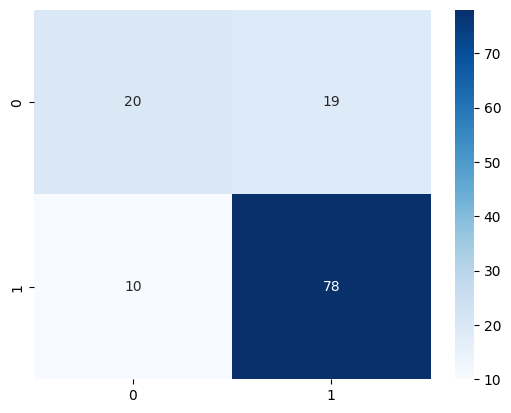

              precision    recall  f1-score   support

           0       0.67      0.51      0.58        39
           1       0.80      0.89      0.84        88

    accuracy                           0.77       127
   macro avg       0.74      0.70      0.71       127
weighted avg       0.76      0.77      0.76       127



In [124]:
#XgBoost

xg = XGBClassifier()
xg.fit(X_train,y_train)

xg_y_pred =xg.predict(X_test)

print("The accuracy Score is: ")
print(accuracy_score(y_test,xg_y_pred))

cm = confusion_matrix(y_test,xg_y_pred)
sns.heatmap(cm,annot=True, fmt='d',cmap='Blues')
plt.show()

print(classification_report(y_test, xg_y_pred))

The accuracy Score is: 
0.7716535433070866


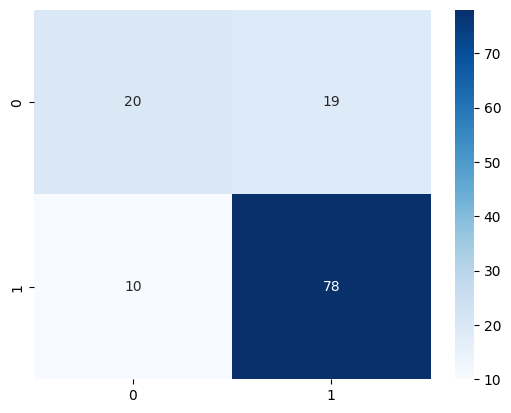

              precision    recall  f1-score   support

           0       0.67      0.51      0.58        39
           1       0.80      0.89      0.84        88

    accuracy                           0.77       127
   macro avg       0.74      0.70      0.71       127
weighted avg       0.76      0.77      0.76       127



In [125]:
#After handling the class imbalance

xg = XGBClassifier(class_weight='balanced', random_state=42)
xg.fit(X_train,y_train)

xg_y_pred =xg.predict(X_test)

print("The accuracy Score is: ")
print(accuracy_score(y_test,xg_y_pred))

cm = confusion_matrix(y_test,xg_y_pred)
sns.heatmap(cm,annot=True, fmt='d',cmap='Blues')
plt.show()

print(classification_report(y_test, xg_y_pred))

The accuracy Score is: 
0.7559055118110236


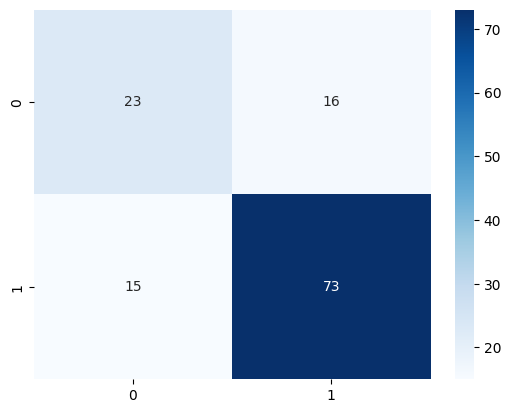

              precision    recall  f1-score   support

           0       0.61      0.59      0.60        39
           1       0.82      0.83      0.82        88

    accuracy                           0.76       127
   macro avg       0.71      0.71      0.71       127
weighted avg       0.75      0.76      0.76       127



In [135]:
# After using SMOTE performance of xgboost


smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)
xg.fit(X_train_res, y_train_res)

xg_y_pred =xg.predict(X_test)

print("The accuracy Score is: ")
print(accuracy_score(y_test,xg_y_pred))

cm = confusion_matrix(y_test,xg_y_pred)
sns.heatmap(cm,annot=True, fmt='d',cmap='Blues')
plt.show()

print(classification_report(y_test, xg_y_pred))

SVM

The accuracy Score is: 
0.8267716535433071
Confusion Matrix:
 [[18 21]
 [ 1 87]]


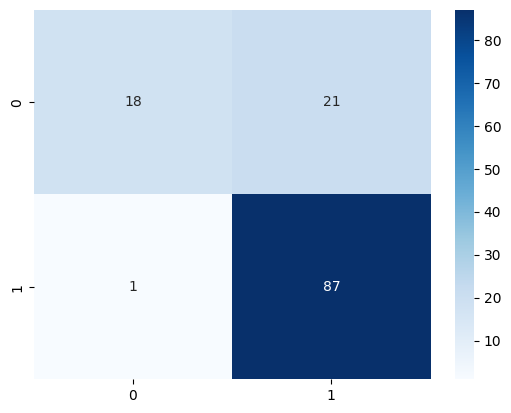


Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.46      0.62        39
           1       0.81      0.99      0.89        88

    accuracy                           0.83       127
   macro avg       0.88      0.73      0.75       127
weighted avg       0.85      0.83      0.81       127



In [145]:
from sklearn.svm import SVC

svm_model = SVC(kernel='rbf', random_state=42)

svm_model.fit(X_train,y_train)
svm_y_pred = svm_model.predict(X_test)

print("The accuracy Score is: ")
print(accuracy_score(y_test,svm_y_pred))
# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, svm_y_pred))
cm = confusion_matrix(y_test,svm_y_pred)
sns.heatmap(cm,annot=True, fmt='d',cmap='Blues')
plt.show()
print("\nClassification Report:\n", classification_report(y_test, svm_y_pred))

In [146]:
#After balancing the class imbalance

svm_model = SVC(class_weight='balanced',kernel='rbf', random_state=42)

svm_model.fit(X_train,y_train)
svm_y_pred = svm_model.predict(X_test)

print("The accuracy Score is: ")
print(accuracy_score(y_test,svm_y_pred))
# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, svm_y_pred))
print("\nClassification Report:\n", classification_report(y_test, svm_y_pred))

The accuracy Score is: 
0.8188976377952756
Confusion Matrix:
 [[23 16]
 [ 7 81]]

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.59      0.67        39
           1       0.84      0.92      0.88        88

    accuracy                           0.82       127
   macro avg       0.80      0.76      0.77       127
weighted avg       0.81      0.82      0.81       127



In [147]:
svm_model = SVC(class_weight='balanced',kernel='linear', random_state=42)

svm_model.fit(X_train,y_train)
svm_y_pred = svm_model.predict(X_test)

print("The accuracy Score is: ")
print(accuracy_score(y_test,svm_y_pred))
# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, svm_y_pred))
print("\nClassification Report:\n", classification_report(y_test, svm_y_pred))

The accuracy Score is: 
0.8267716535433071
Confusion Matrix:
 [[18 21]
 [ 1 87]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.46      0.62        39
           1       0.81      0.99      0.89        88

    accuracy                           0.83       127
   macro avg       0.88      0.73      0.75       127
weighted avg       0.85      0.83      0.81       127



The accuracy Score is: 
0.8110236220472441


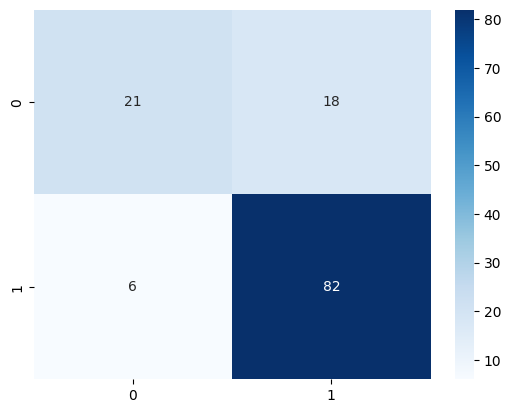

              precision    recall  f1-score   support

           0       0.78      0.54      0.64        39
           1       0.82      0.93      0.87        88

    accuracy                           0.81       127
   macro avg       0.80      0.74      0.75       127
weighted avg       0.81      0.81      0.80       127



In [149]:
#Using SMOTE to handle imabalance in the dataset
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)
svm=SVC(kernel='rbf', random_state=42)
svm.fit(X_train_res, y_train_res)

svm_y_pred =svm.predict(X_test)

print("The accuracy Score is: ")
print(accuracy_score(y_test,svm_y_pred))

cm = confusion_matrix(y_test,svm_y_pred)
sns.heatmap(cm,annot=True, fmt='d',cmap='Blues')
plt.show()

print(classification_report(y_test, svm_y_pred))

Performing Hyperparameter Tuning for logistic regression as it has turned out to be the best model

In [ ]:
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear'],  # supports l1 & l2
    'class_weight': ['balanced']
}


# Use F1-score for class 0 as scoring

scorer = make_scorer(f1_score, pos_label=0)

# GridSearchCV with 5-fold CV

grid = GridSearchCV(LogisticRegression(), param_grid, scoring=scorer, cv=5, n_jobs=1)
grid.fit(X_train, y_train)

print("Best Hyperparameters:", grid.best_params_)


Best Hyperparameters: {'C': 0.1, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'liblinear'}


Confusion Matrix:


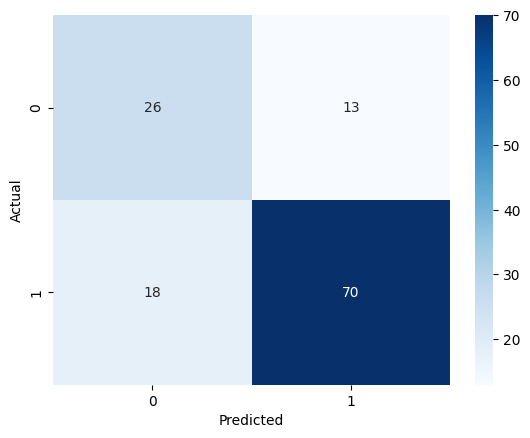

Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.67      0.63        39
           1       0.84      0.80      0.82        88

    accuracy                           0.76       127
   macro avg       0.72      0.73      0.72       127
weighted avg       0.77      0.76      0.76       127


Cross-Validation F1-scores for each param combination:
F1-score: 0.472 - Params: {'C': 0.01, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'liblinear'}
F1-score: 0.480 - Params: {'C': 0.01, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'liblinear'}
F1-score: 0.541 - Params: {'C': 0.1, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'liblinear'}
F1-score: 0.536 - Params: {'C': 0.1, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'liblinear'}
F1-score: 0.498 - Params: {'C': 1, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'liblinear'}
F1-score: 0.532 - Params: {'C': 1, 'class_weight': 'balanced', 'penal

In [320]:
y_proba = grid.best_estimator_.predict_proba(X_test)[:, 1]  # probability of class 1

#Threshold adjustment
threshold = 0.58  # tune this if you want higher minority recall
y_pred = (y_proba > threshold).astype(int)

#Evaluate Model
print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print("Classification Report:")
print(classification_report(y_test, y_pred))

#check CV results
cv_results = grid.cv_results_
print("\nCross-Validation F1-scores for each param combination:")
for mean_score, params in zip(cv_results['mean_test_score'], cv_results['params']):
    print(f"F1-score: {mean_score:.3f} - Params: {params}")

In [313]:
#For Logistic Regression

from sklearn.linear_model import LogisticRegression

# --- Grid Search on Imbalanced Data ---
lr_params = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs']
}

lr = LogisticRegression(max_iter=1000, random_state=42)
grid_lr = GridSearchCV(lr, lr_params, cv=5, scoring='f1')
grid_lr.fit(X_train, y_train)

best_lr = grid_lr.best_estimator_
print("Best Logistic Regression Params:", grid_lr.best_params_)

# --- Evaluate before SMOTE ---
log_y_pred_before = best_lr.predict(X_test)
print("Before SMOTE:\n", classification_report(y_test, log_y_pred_before))

# --- Apply SMOTE ---
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

# --- Retrain with same best params ---
best_lr.fit(X_train_res, y_train_res)
log_y_pred_after = best_lr.predict(X_test)

print("After SMOTE:\n", classification_report(y_test, log_y_pred_after))


Best Logistic Regression Params: {'C': 1, 'solver': 'liblinear'}
Before SMOTE:
               precision    recall  f1-score   support

           0       0.95      0.46      0.62        39
           1       0.81      0.99      0.89        88

    accuracy                           0.83       127
   macro avg       0.88      0.73      0.75       127
weighted avg       0.85      0.83      0.81       127

After SMOTE:
               precision    recall  f1-score   support

           0       0.61      0.72      0.66        39
           1       0.86      0.80      0.83        88

    accuracy                           0.77       127
   macro avg       0.74      0.76      0.74       127
weighted avg       0.79      0.77      0.78       127



In [336]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_curve, accuracy_score, f1_score
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
import numpy as np

# --- Grid Search on Imbalanced Data ---
lr_params = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs']
}

lr = LogisticRegression(max_iter=1000, random_state=42)
grid_lr = GridSearchCV(lr, lr_params, cv=5, scoring='f1', n_jobs=1)
grid_lr.fit(X_train, y_train)

best_lr = grid_lr.best_estimator_
print("Best Logistic Regression Params:", grid_lr.best_params_)

# --- Function to find best threshold ---
def find_best_threshold(model, X_val, y_val):
    y_probs = model.predict_proba(X_val)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_val, y_probs)
    f1_scores = [f1_score(y_val, (y_probs >= t).astype(int)) for t in thresholds]
    best_t = thresholds[np.argmax(f1_scores)]
    return best_t

# --- Before SMOTE ---
best_lr.fit(X_train, y_train)
best_threshold_before = find_best_threshold(best_lr, X_test, y_test)

y_probs_before = best_lr.predict_proba(X_test)[:, 1]
log_y_pred_before = (y_probs_before >= best_threshold_before).astype(int)

print(f"Optimal Threshold (Before SMOTE): {best_threshold_before:.3f}")
print("Before SMOTE:\n", classification_report(y_test, log_y_pred_before))

# --- Apply SMOTE ---
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

# --- Retrain with same best params ---
best_lr.fit(X_train_res, y_train_res)

# --- Find best threshold again ---
best_threshold_after = find_best_threshold(best_lr, X_test, y_test)

y_probs_after = best_lr.predict_proba(X_test)[:, 1]
log_y_pred_after = (y_probs_after >= best_threshold_after).astype(int)

print(f"\nOptimal Threshold (After SMOTE): {best_threshold_after:.3f}")
print("After SMOTE:\n", classification_report(y_test, log_y_pred_after))


Best Logistic Regression Params: {'C': 1, 'solver': 'liblinear'}
Optimal Threshold (Before SMOTE): 0.564
Before SMOTE:
               precision    recall  f1-score   support

           0       0.95      0.49      0.64        39
           1       0.81      0.99      0.89        88

    accuracy                           0.83       127
   macro avg       0.88      0.74      0.77       127
weighted avg       0.86      0.83      0.82       127


Optimal Threshold (After SMOTE): 0.263
After SMOTE:
               precision    recall  f1-score   support

           0       0.94      0.44      0.60        39
           1       0.80      0.99      0.88        88

    accuracy                           0.82       127
   macro avg       0.87      0.71      0.74       127
weighted avg       0.84      0.82      0.80       127



In [314]:
from sklearn.tree import DecisionTreeClassifier

dt_params = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

dt = DecisionTreeClassifier(random_state=42)
grid_dt = GridSearchCV(dt, dt_params, cv=5, scoring='f1')
grid_dt.fit(X_train, y_train)

best_dt = grid_dt.best_estimator_
print("Best Decision Tree Params:", grid_dt.best_params_)

dt_y_pred_before = best_dt.predict(X_test)
print("Before SMOTE:\n", classification_report(y_test, dt_y_pred_before))

sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

best_dt.fit(X_train_res, y_train_res)
dt_y_pred_after = best_dt.predict(X_test)

print("After SMOTE:\n", classification_report(y_test, dt_y_pred_after))


Best Decision Tree Params: {'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 2}
Before SMOTE:
               precision    recall  f1-score   support

           0       0.94      0.44      0.60        39
           1       0.80      0.99      0.88        88

    accuracy                           0.82       127
   macro avg       0.87      0.71      0.74       127
weighted avg       0.84      0.82      0.80       127

After SMOTE:
               precision    recall  f1-score   support

           0       0.94      0.44      0.60        39
           1       0.80      0.99      0.88        88

    accuracy                           0.82       127
   macro avg       0.87      0.71      0.74       127
weighted avg       0.84      0.82      0.80       127



In [315]:
from sklearn.ensemble import RandomForestClassifier

rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rf = RandomForestClassifier(random_state=42)
grid_rf = GridSearchCV(rf, rf_params, cv=5, scoring='f1', n_jobs=1)
grid_rf.fit(X_train, y_train)

best_rf = grid_rf.best_estimator_
print("Best Random Forest Params:", grid_rf.best_params_)

rf_y_pred_before = best_rf.predict(X_test)
print("Before SMOTE:\n", classification_report(y_test, rf_y_pred_before))

sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

best_rf.fit(X_train_res, y_train_res)
rf_y_pred_after = best_rf.predict(X_test)

print("After SMOTE:\n", classification_report(y_test, rf_y_pred_after))


Best Random Forest Params: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Before SMOTE:
               precision    recall  f1-score   support

           0       0.95      0.46      0.62        39
           1       0.81      0.99      0.89        88

    accuracy                           0.83       127
   macro avg       0.88      0.73      0.75       127
weighted avg       0.85      0.83      0.81       127

After SMOTE:
               precision    recall  f1-score   support

           0       0.65      0.51      0.57        39
           1       0.80      0.88      0.84        88

    accuracy                           0.76       127
   macro avg       0.72      0.69      0.70       127
weighted avg       0.75      0.76      0.76       127



In [316]:
from xgboost import XGBClassifier

xgb_params = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0]
}

xgb = XGBClassifier(random_state=42, eval_metric='logloss', use_label_encoder=False)
grid_xgb = GridSearchCV(xgb, xgb_params, cv=5, scoring='f1', n_jobs=1)
grid_xgb.fit(X_train, y_train)

best_xgb = grid_xgb.best_estimator_
print("Best XGBoost Params:", grid_xgb.best_params_)

xgb_y_pred_before = best_xgb.predict(X_test)
print("Before SMOTE:\n", classification_report(y_test, xgb_y_pred_before))

sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

best_xgb.fit(X_train_res, y_train_res)
xgb_y_pred_after = best_xgb.predict(X_test)

print("After SMOTE:\n", classification_report(y_test, xgb_y_pred_after))


Best XGBoost Params: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
Before SMOTE:
               precision    recall  f1-score   support

           0       0.94      0.44      0.60        39
           1       0.80      0.99      0.88        88

    accuracy                           0.82       127
   macro avg       0.87      0.71      0.74       127
weighted avg       0.84      0.82      0.80       127

After SMOTE:
               precision    recall  f1-score   support

           0       0.74      0.51      0.61        39
           1       0.81      0.92      0.86        88

    accuracy                           0.80       127
   macro avg       0.78      0.72      0.73       127
weighted avg       0.79      0.80      0.78       127



In [317]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE

# --- Define model and parameters ---
svm = SVC()

svm_params = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

# --- Hyperparameter tuning on original data ---
grid_svm = GridSearchCV(svm, svm_params, cv=5, scoring='f1', n_jobs=1)
grid_svm.fit(X_train, y_train)

best_svm = grid_svm.best_estimator_
print("Best SVM Params:", grid_svm.best_params_)

# --- Evaluate before SMOTE ---
svm_y_pred_before = best_svm.predict(X_test)
print("\nBefore SMOTE:\n", classification_report(y_test, svm_y_pred_before))

# --- Apply SMOTE ---
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

# --- Retrain the same tuned model on balanced data ---
best_svm.fit(X_train_res, y_train_res)

# --- Evaluate after SMOTE ---
svm_y_pred_after = best_svm.predict(X_test)
print("\nAfter SMOTE:\n", classification_report(y_test, svm_y_pred_after))


Best SVM Params: {'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}

Before SMOTE:
               precision    recall  f1-score   support

           0       0.95      0.46      0.62        39
           1       0.81      0.99      0.89        88

    accuracy                           0.83       127
   macro avg       0.88      0.73      0.75       127
weighted avg       0.85      0.83      0.81       127


After SMOTE:
               precision    recall  f1-score   support

           0       0.91      0.54      0.68        39
           1       0.83      0.98      0.90        88

    accuracy                           0.84       127
   macro avg       0.87      0.76      0.79       127
weighted avg       0.85      0.84      0.83       127



In [329]:
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd

# Example: assuming you already have predictions
# y_pred_before, y_pred_after for each model
# (just update them for each model accordingly)

# --- Example function to extract accuracy and F1 ---
def get_metrics(y_true, y_pred):
    report = classification_report(y_true, y_pred, output_dict=True)
    accuracy = accuracy_score(y_true, y_pred)
    f1 = report['weighted avg']['f1-score']  # use weighted F1 for imbalanced data
    precision = report['weighted avg']['precision']
    recall = report['weighted avg']['recall']
    return accuracy, f1, precision,recall

# Example placeholders for demonstration — replace with your actual values
log_before_acc, log_before_f1, log_before_prec, log_before_rec = get_metrics(y_test, log_y_pred_before)
log_after_acc, log_after_f1,  log_after_prec, log_after_rec  = get_metrics(y_test, log_y_pred_after)

dt_before_acc, dt_before_f1,dt_before_prec, dt_before_rec  = get_metrics(y_test, dt_y_pred_before)
dt_after_acc, dt_after_f1,dt_after_prec, dt_after_rec  = get_metrics(y_test, dt_y_pred_after)

rf_before_acc, rf_before_f1, rf_before_prec, rf_before_rec= get_metrics(y_test, rf_y_pred_before)
rf_after_acc, rf_after_f1, rf_after_prec, rf_after_rec  = get_metrics(y_test, rf_y_pred_after)

xgb_before_acc, xgb_before_f1, xgb_before_prec, xgb_before_rec  = get_metrics(y_test, xgb_y_pred_before)
xgb_after_acc, xgb_after_f1, xgb_after_prec, xgb_after_rec  = get_metrics(y_test, xgb_y_pred_after)



# --- Combine into DataFrame ---
comparison_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost'],
    'Accuracy (Before)': [log_before_acc, dt_before_acc, rf_before_acc, xgb_before_acc],
    'F1 (Before)': [log_before_f1, dt_before_f1, rf_before_f1, xgb_before_f1],
    'Precision (Before)': [log_before_prec, dt_before_prec, rf_before_prec, xgb_before_prec],
    'Recall (Before)': [log_before_rec, dt_before_rec, rf_before_rec, xgb_before_rec],

    'Accuracy (After)': [log_after_acc, dt_after_acc, rf_after_acc, xgb_after_acc],
    'F1 (After)': [log_after_f1, dt_after_f1, rf_after_f1, xgb_after_f1],
    'Precision (After)': [log_after_prec, dt_after_prec, rf_after_prec, xgb_after_prec],
    'Recall (After)': [log_after_rec, dt_after_rec, rf_after_rec, xgb_after_rec]
})

print(comparison_df)


                 Model  Accuracy (Before)  F1 (Before)  Precision (Before)  \
0  Logistic Regression           0.826772     0.805743            0.849104   
1        Decision Tree           0.818898     0.795189            0.843086   
2        Random Forest           0.826772     0.805743            0.849104   
3              XGBoost           0.818898     0.795189            0.843086   

   Recall (Before)  Accuracy (After)  F1 (After)  Precision (After)  \
0         0.826772          0.771654    0.776327           0.785736   
1         0.818898          0.818898    0.795189           0.843086   
2         0.826772          0.763780    0.755416           0.753895   
3         0.818898          0.795276    0.783198           0.788731   

   Recall (After)  
0        0.771654  
1        0.818898  
2        0.763780  
3        0.795276  


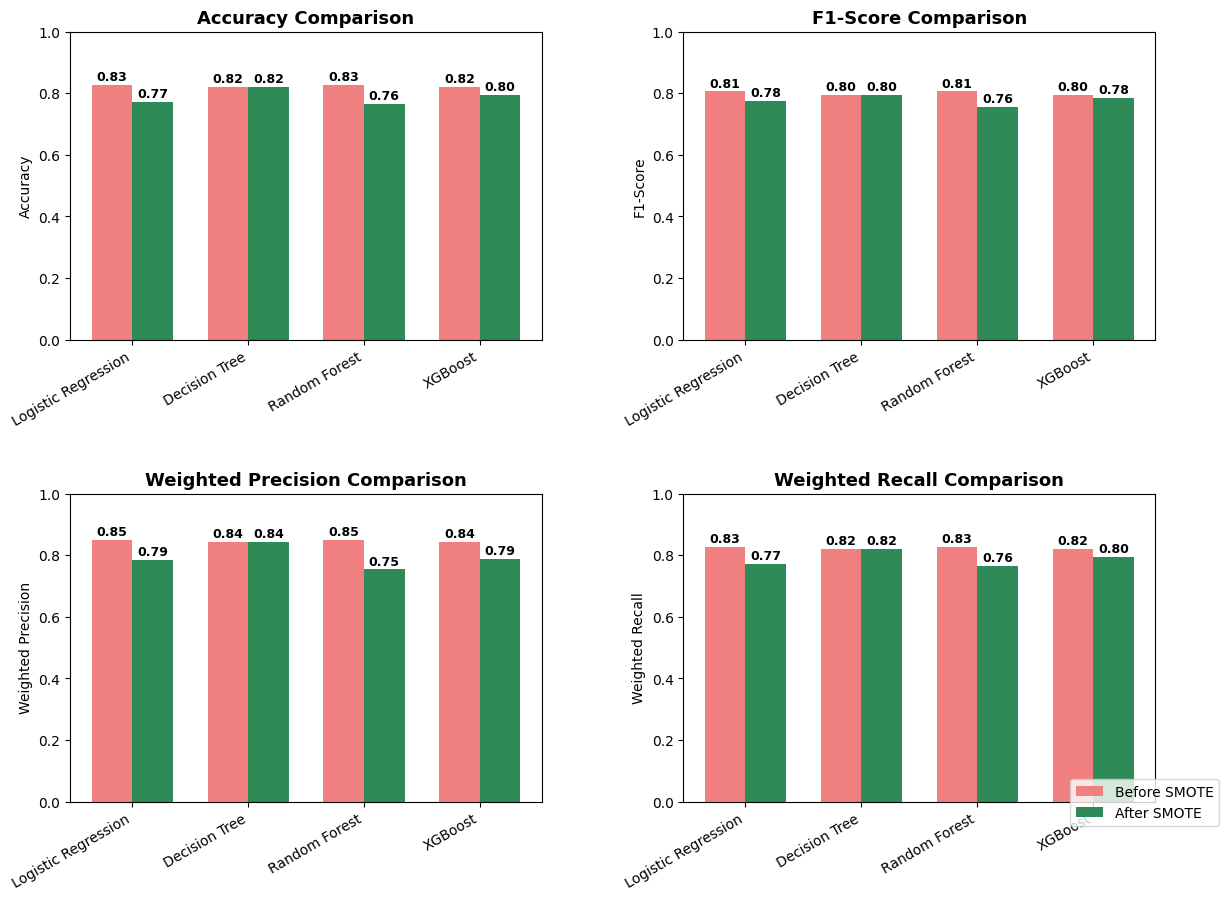

In [334]:
import matplotlib.pyplot as plt
import numpy as np

# Extract data
models = comparison_df['Model']
acc_before = comparison_df['Accuracy (Before)']
acc_after = comparison_df['Accuracy (After)']
f1_before = comparison_df['F1 (Before)']
f1_after = comparison_df['F1 (After)']
prec_before = comparison_df['Precision (Before)']
prec_after = comparison_df['Precision (After)']
recall_before = comparison_df['Recall (Before)']
recall_after = comparison_df['Recall (After)']

x = np.arange(len(models))
width = 0.35

# Increase height to allow more vertical spacing
plt.figure(figsize=(14,10))

# --- Accuracy ---
plt.subplot(2, 2, 1)
bars1 = plt.bar(x - width/2, acc_before, width, label='Before SMOTE', color='lightcoral')
bars2 = plt.bar(x + width/2, acc_after, width, label='After SMOTE', color='seagreen')
plt.title('Accuracy Comparison', fontsize=13, fontweight='bold')
plt.ylabel('Accuracy')
plt.xticks(x, models, rotation=30, ha='right')
plt.ylim(0, 1)
for b in bars1 + bars2:
    plt.text(b.get_x() + b.get_width()/2, b.get_height() + 0.015, f"{b.get_height():.2f}", 
             ha='center', fontsize=9, fontweight='bold')

# --- F1-Score ---
plt.subplot(2, 2, 2)
bars3 = plt.bar(x - width/2, f1_before, width, label='Before SMOTE', color='lightcoral')
bars4 = plt.bar(x + width/2, f1_after, width, label='After SMOTE', color='seagreen')
plt.title('F1-Score Comparison', fontsize=13, fontweight='bold')
plt.ylabel('F1-Score')
plt.xticks(x, models, rotation=30, ha='right')
plt.ylim(0, 1)
for b in bars3 + bars4:
    plt.text(b.get_x() + b.get_width()/2, b.get_height() + 0.015, f"{b.get_height():.2f}", 
             ha='center', fontsize=9, fontweight='bold')

# --- Weighted Precision ---
plt.subplot(2, 2, 3)
bars5 = plt.bar(x - width/2, prec_before, width, label='Before SMOTE', color='lightcoral')
bars6 = plt.bar(x + width/2, prec_after, width, label='After SMOTE', color='seagreen')
plt.title('Weighted Precision Comparison', fontsize=13, fontweight='bold')
plt.ylabel('Weighted Precision')
plt.xticks(x, models, rotation=30, ha='right')
plt.ylim(0, 1)
for b in bars5 + bars6:
    plt.text(b.get_x() + b.get_width()/2, b.get_height() + 0.015, f"{b.get_height():.2f}", 
             ha='center', fontsize=9, fontweight='bold')

# --- Weighted Recall ---
plt.subplot(2, 2, 4)
bars7 = plt.bar(x - width/2, recall_before, width, label='Before SMOTE', color='lightcoral')
bars8 = plt.bar(x + width/2, recall_after, width, label='After SMOTE', color='seagreen')
plt.title('Weighted Recall Comparison', fontsize=13, fontweight='bold')
plt.ylabel('Weighted Recall')
plt.xticks(x, models, rotation=30, ha='right')
plt.ylim(0, 1)
for b in bars7 + bars8:
    plt.text(b.get_x() + b.get_width()/2, b.get_height() + 0.015, f"{b.get_height():.2f}", 
             ha='center', fontsize=9, fontweight='bold')

# Adjust subplot spacing to prevent any overlap
plt.subplots_adjust(hspace=0.5, wspace=0.3)  

# Move legend outside
plt.legend(loc='lower right', bbox_to_anchor=(1.15, -0.1))

plt.show()
